In [3]:
import pandas as pd

df_sell_date_column = pd.read_csv("df_sell_date_column.csv")
df_sell_date_column = df_sell_date_column.drop(['Unnamed: 0'], axis = 1)
df = pd.read_csv("df_sell_final.csv")
df_evaluation = pd.read_csv("data/m5-forecasting-accuracy/sales_train_evaluation.csv")
df_calender= pd.read_csv("df_calender.csv")
df_sales = pd.read_csv('df_sales.csv')

In [4]:
import matplotlib.pyplot as plt
df_calender['date'] = pd.to_datetime(df_calender['date'])

In [5]:
df_sell_date_column

id  2011-01-29  2011-01-30  2011-01-31  \
0          FOODS_1_001_CA_1_evaluation         0.0        0.00        0.00   
1          FOODS_1_001_CA_2_evaluation         0.0        0.00        0.00   
2          FOODS_1_001_CA_3_evaluation         0.0        0.00        0.00   
3          FOODS_1_001_CA_4_evaluation         0.0        0.00        0.00   
4          FOODS_1_001_TX_1_evaluation         0.0        0.00        0.00   
...                                ...         ...         ...         ...   
30485  HOUSEHOLD_2_516_TX_2_evaluation         0.0        0.00       11.88   
30486  HOUSEHOLD_2_516_TX_3_evaluation         0.0        0.00        0.00   
30487  HOUSEHOLD_2_516_WI_1_evaluation         0.0       35.64        0.00   
30488  HOUSEHOLD_2_516_WI_2_evaluation         0.0        0.00        0.00   
30489  HOUSEHOLD_2_516_WI_3_evaluation         0.0        0.00        0.00   

       2011-02-01  2011-02-02  2011-02-03  2011-02-04  2011-02-05  2011-02-06  \
0            0.00        0.00        0.00        0.00        0.00        0.00   
1            0.00        0.00        0.00        0.00        0.00        0.00   
2            0.00        0.00        0.00        0.00        0.00        0.00   
3            0.00        0.00        0.00        0.00        0.00        0.00   
4            0.00        0.00        0.00        0.00        0.00        0.00   
...           ...         ...         ...         ...         ...         ...   
30485       11.88        0.00       17.82        5.94       23.76        5.94   
30486        0.00        0.00       29.70        0.00        5.94        5.94   
30487       11.88       11.88       23.76        5.94       47.52       29.70   
30488        0.00        0.00        0.00        0.00        0.00        0.00   
30489        0.00        0.00        0.00        0.00        0.00        0.00   

       ...  2016-05-13  2016-05-14  2016-05-15  2016-05-16  2016-05-17  \
0      ...        4.48        8.96        0.00        0.00        0.00   
1      ...        0.00        2.24        4.48        2.24        2.24   
2      ...        2.24        0.00        4.48        0.00        0.00   
3      ...        2.24        2.24        0.00        8.96        0.00   
4      ...        0.00        0.00        0.00        4.48        2.24   
...    ...         ...         ...         ...         ...         ...   
30485  ...        5.94        0.00       17.82        0.00        5.94   
30486  ...        0.00        0.00        0.00        0.00        0.00   
30487  ...        0.00        0.00        5.94       11.88        0.00   
30488  ...        5.94        5.94        5.94       23.76       35.64   
30489  ...        5.94       11.88        0.00       29.70       23.76   

       2016-05-18  2016-05-19  2016-05-20  2016-05-21  2016-05-22  
0            0.00        6.72        6.72        0.00        2.24  
1            0.00        0.00        0.00        0.00        0.00  
2            0.00        4.48        6.72        0.00        2.24  
3            2.24        6.72        0.00        4.48       13.44  
4            0.00        0.00        4.48        2.24        0.00  
...           ...         ...         ...         ...         ...  
30485        5.94        0.00        0.00        5.94        5.94  
30486        0.00        5.94        0.00        5.94        0.00  
30487        5.94        0.00        5.94        0.00       11.88  
30488        0.00        5.94        5.94        5.94        0.00  
30489        0.00       11.88       11.88       29.70        5.94  

[30490 rows x 1942 columns]

In [6]:
data_melt = df_sell_date_column.melt(id_vars='id', var_name='date', value_name='Daily_total_sales')

In [7]:
data_melt_and_ids = data_melt.merge(df_evaluation[['id','item_id', 'dept_id','cat_id','store_id','state_id']], on = 'id')

In [8]:
data_melt_and_ids

id        date  Daily_total_sales  \
0             FOODS_1_001_CA_1_evaluation  2011-01-29               0.00   
1             FOODS_1_001_CA_1_evaluation  2011-01-30               0.00   
2             FOODS_1_001_CA_1_evaluation  2011-01-31               0.00   
3             FOODS_1_001_CA_1_evaluation  2011-02-01               0.00   
4             FOODS_1_001_CA_1_evaluation  2011-02-02               0.00   
...                                   ...         ...                ...   
59181085  HOUSEHOLD_2_516_WI_3_evaluation  2016-05-18               0.00   
59181086  HOUSEHOLD_2_516_WI_3_evaluation  2016-05-19              11.88   
59181087  HOUSEHOLD_2_516_WI_3_evaluation  2016-05-20              11.88   
59181088  HOUSEHOLD_2_516_WI_3_evaluation  2016-05-21              29.70   
59181089  HOUSEHOLD_2_516_WI_3_evaluation  2016-05-22               5.94   

                  item_id      dept_id     cat_id store_id state_id  
0             FOODS_1_001      FOODS_1      FOODS     CA_1       CA  
1             FOODS_1_001      FOODS_1      FOODS     CA_1       CA  
2             FOODS_1_001      FOODS_1      FOODS     CA_1       CA  
3             FOODS_1_001      FOODS_1      FOODS     CA_1       CA  
4             FOODS_1_001      FOODS_1      FOODS     CA_1       CA  
...                   ...          ...        ...      ...      ...  
59181085  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     WI_3       WI  
59181086  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     WI_3       WI  
59181087  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     WI_3       WI  
59181088  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     WI_3       WI  
59181089  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     WI_3       WI  

[59181090 rows x 8 columns]

In [9]:
data_melt_and_ids['date'] = pd.to_datetime(data_melt_and_ids['date'])


In [10]:
data_melt_and_ids['dept_id'].unique()

array(['FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2',
       'HOUSEHOLD_1', 'HOUSEHOLD_2'], dtype=object)

In [154]:
import seaborn as sns

data_CA = data_melt_and_ids.loc[data_melt_and_ids['state_id'] == 'CA']
data_TX = data_melt_and_ids.loc[data_melt_and_ids['state_id'] == 'TX']
data_WI = data_melt_and_ids.loc[data_melt_and_ids['state_id'] == 'WI']
data_Overall_State = data_melt_and_ids.groupby(['date','state_id'])['Daily_total_sales'].sum().to_frame('Total_Sell')
data_Overall_State = data_Overall_State.reset_index()
data_Overall_Store = data_melt_and_ids.groupby(['date','store_id'])['Daily_total_sales'].sum().to_frame('Total_Sell')
data_Overall_Store = data_Overall_Store.reset_index()
total_sales_by_store_category = data_melt_and_ids.groupby(['date','cat_id'])['Daily_total_sales'].sum().to_frame('Total_Sell')
total_sales_by_store_category = total_sales_by_store_category.reset_index()

In [155]:
total_sales_by_store_CA = data_CA.groupby(['date','store_id'])['Daily_total_sales'].sum().to_frame('Total_Sell')
total_sales_by_store_CA = total_sales_by_store_CA.reset_index()
total_sales_by_store_TX = data_TX.groupby(['date','store_id'])['Daily_total_sales'].sum().to_frame('Total_Sell')
total_sales_by_store_TX = total_sales_by_store_TX.reset_index()
total_sales_by_store_WI = data_WI.groupby(['date','store_id'])['Daily_total_sales'].sum().to_frame('Total_Sell')
total_sales_by_store_WI = total_sales_by_store_WI.reset_index()

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


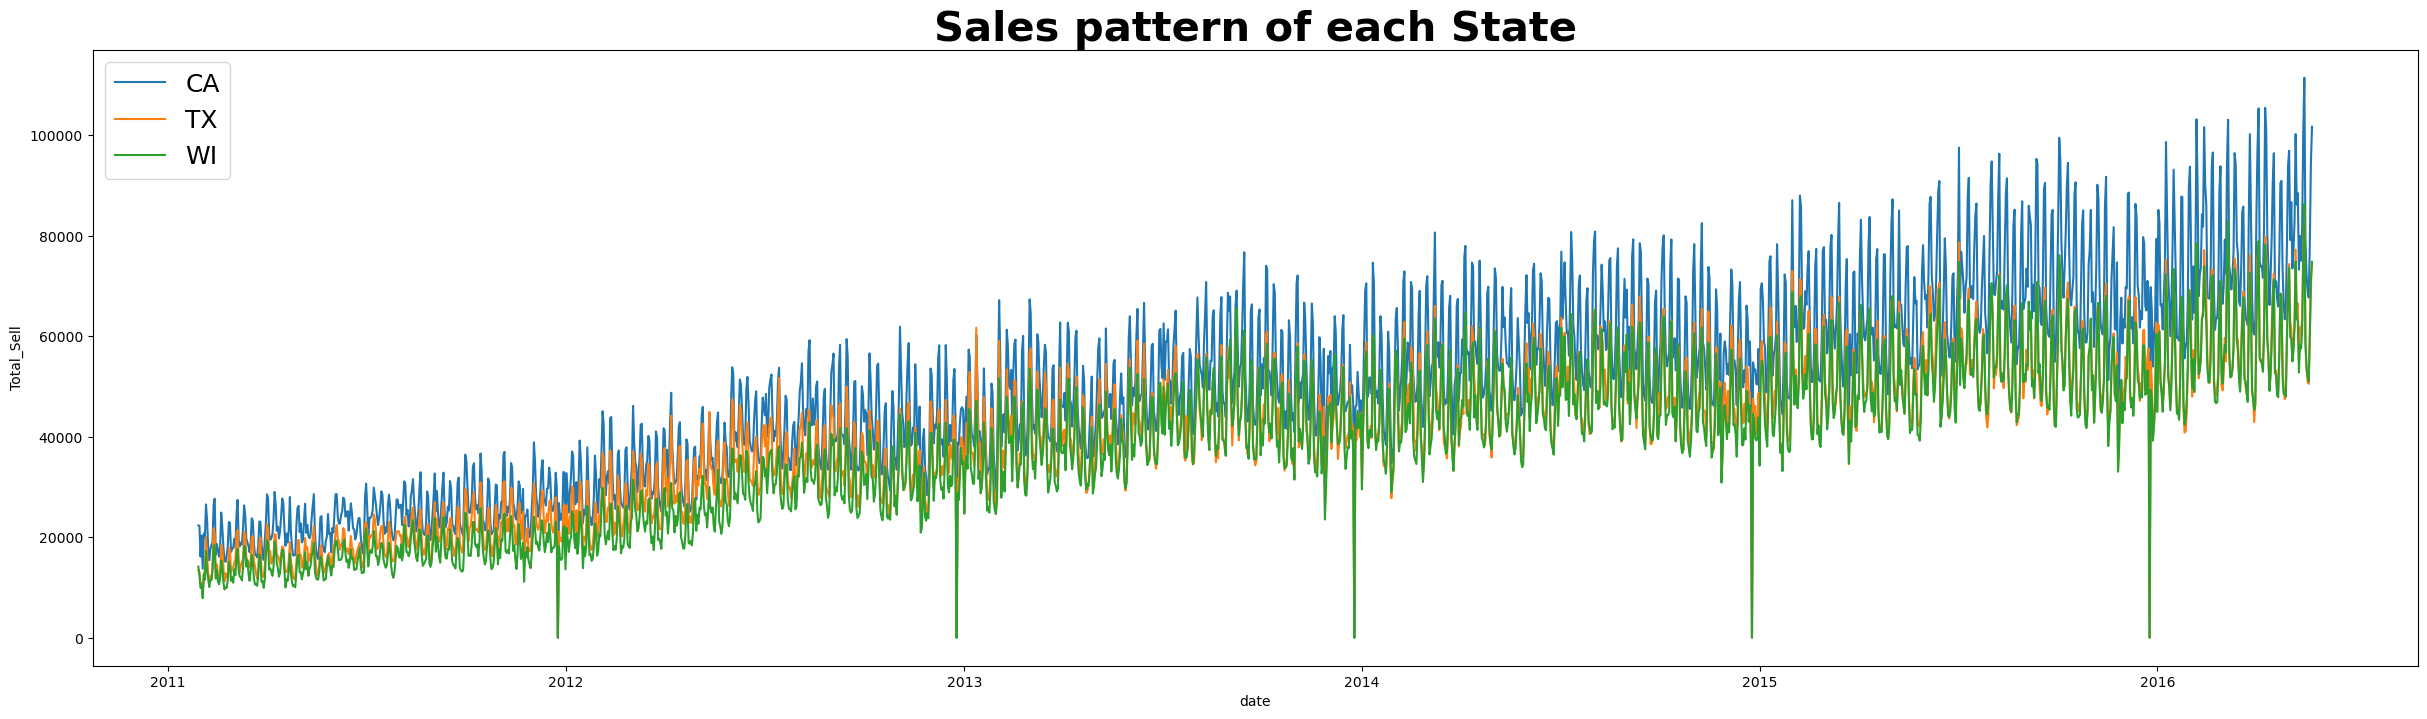

In [161]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="state_id",
             data=data_Overall_State)
plt.legend( prop ={'size':18})
plt.title("Sales pattern of each State", fontsize = 30, weight = 'bold')
plt.show()

The daily items being sold per state seeems highest at the stores located in CA, however, the data may be only high due to CA having 1 extra store is included in the data.

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


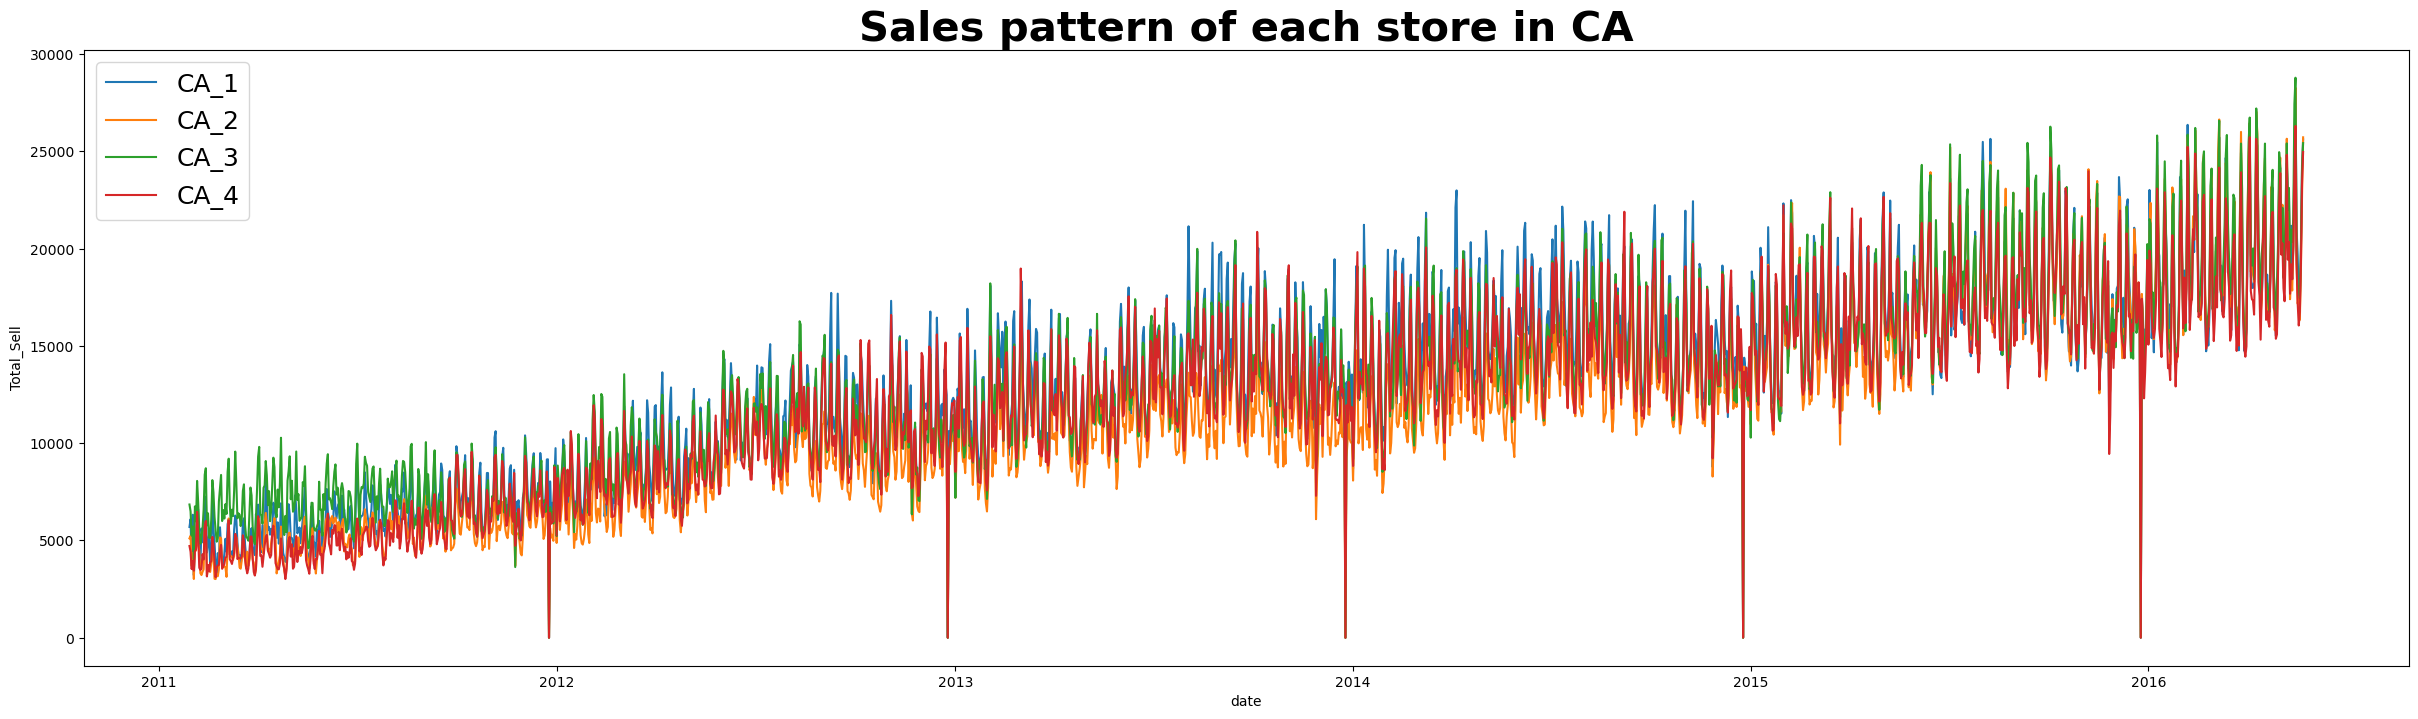

In [160]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="store_id",
             data=total_sales_by_store_CA)
plt.legend( prop ={'size':18})
plt.title("Sales pattern of each store in CA", fontsize = 30, weight = 'bold')
plt.show()

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


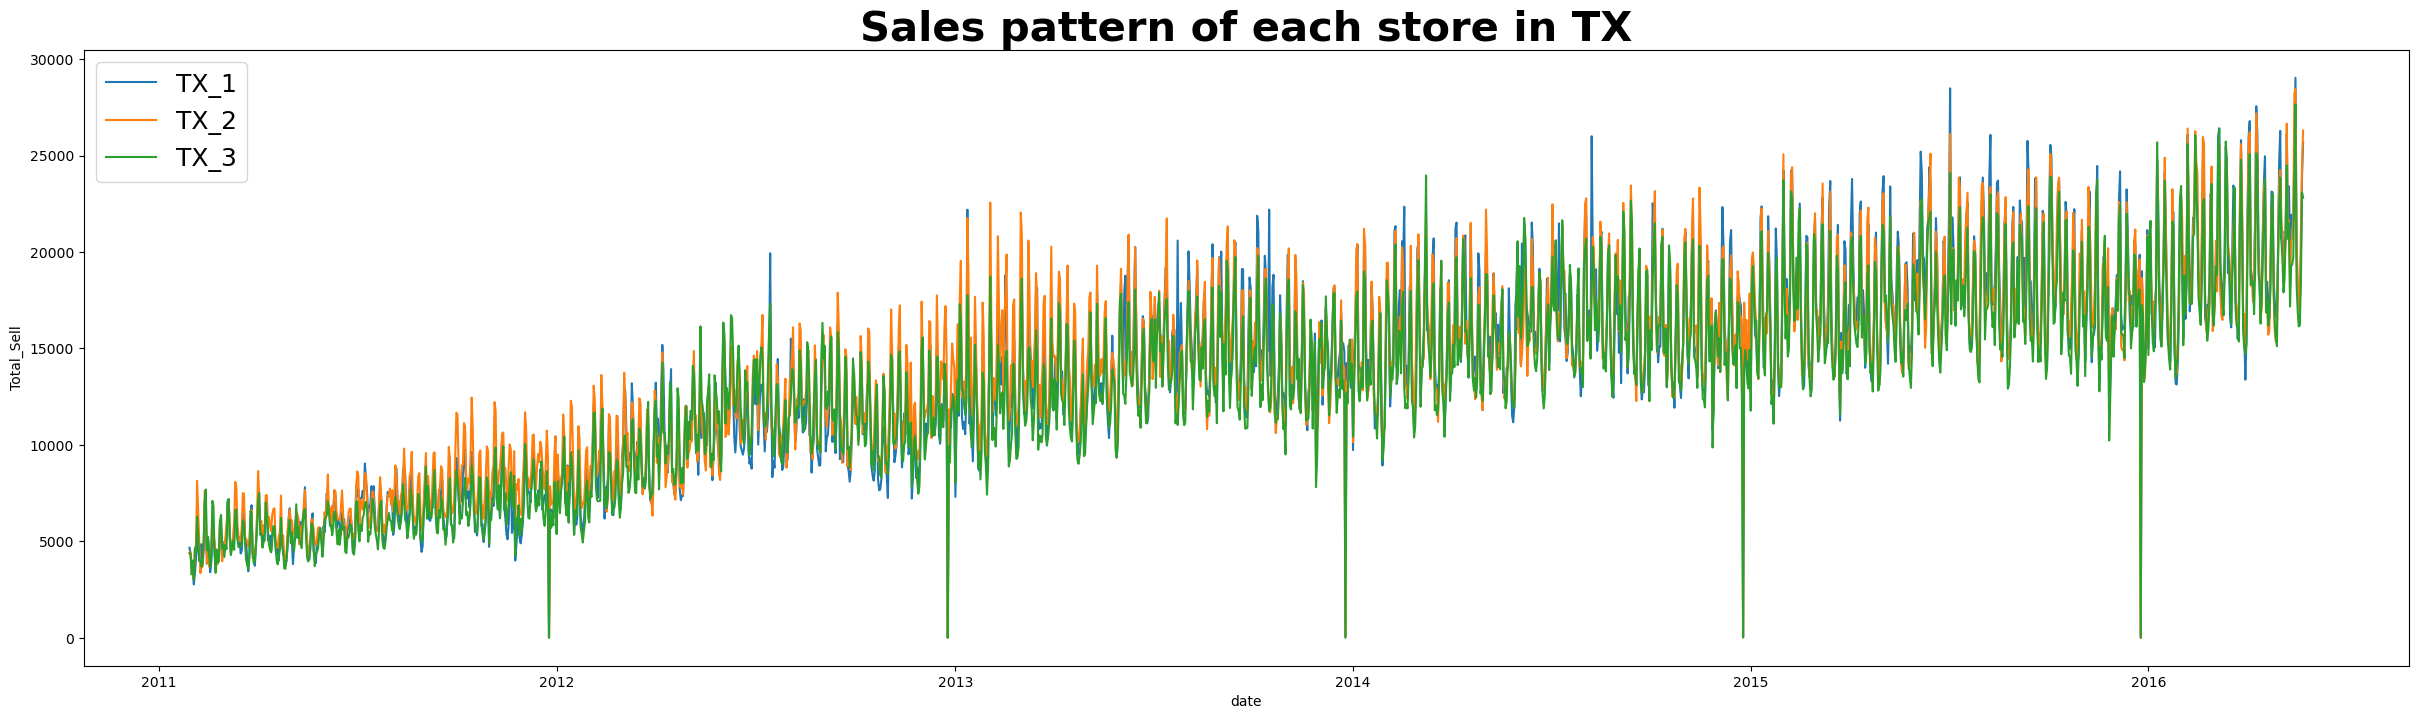

In [159]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="store_id",
             data=total_sales_by_store_TX)
plt.legend( prop ={'size':18})
plt.title("Sales pattern of each store in TX", fontsize = 30, weight = 'bold')
plt.show()

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


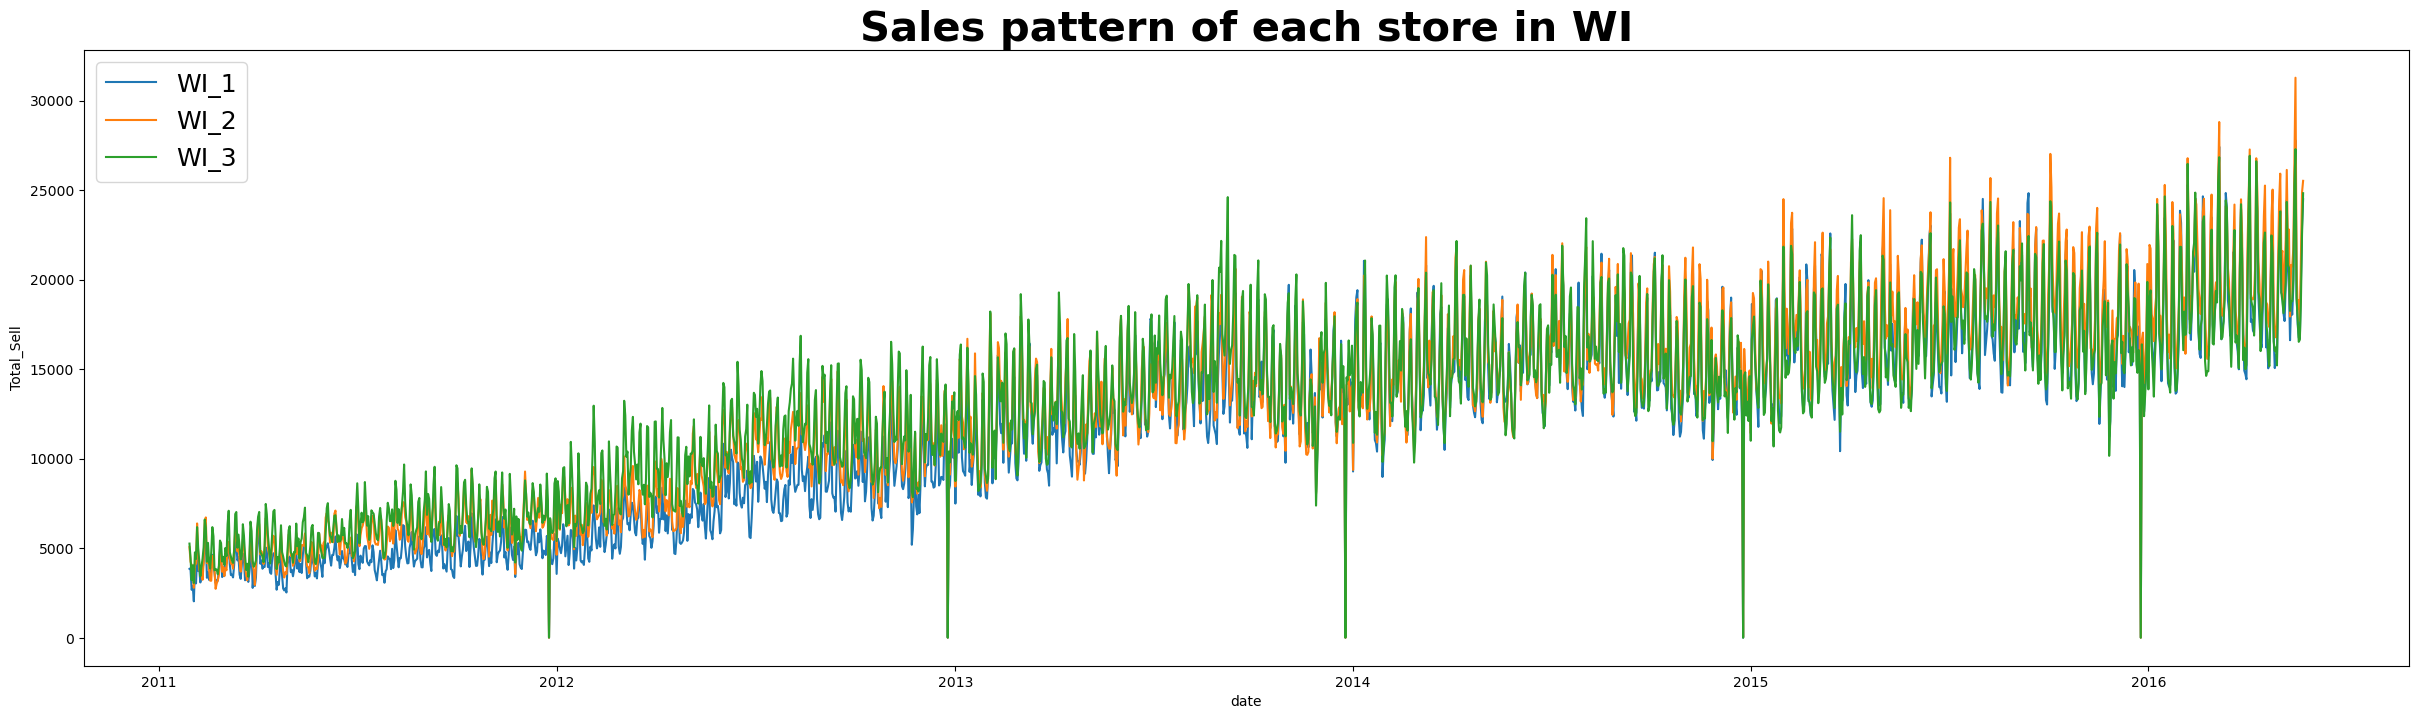

In [158]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="store_id",
             data=total_sales_by_store_WI)
plt.legend( prop ={'size':18})
plt.title("Sales pattern of each store in WI", fontsize = 30, weight = 'bold')
plt.show()

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


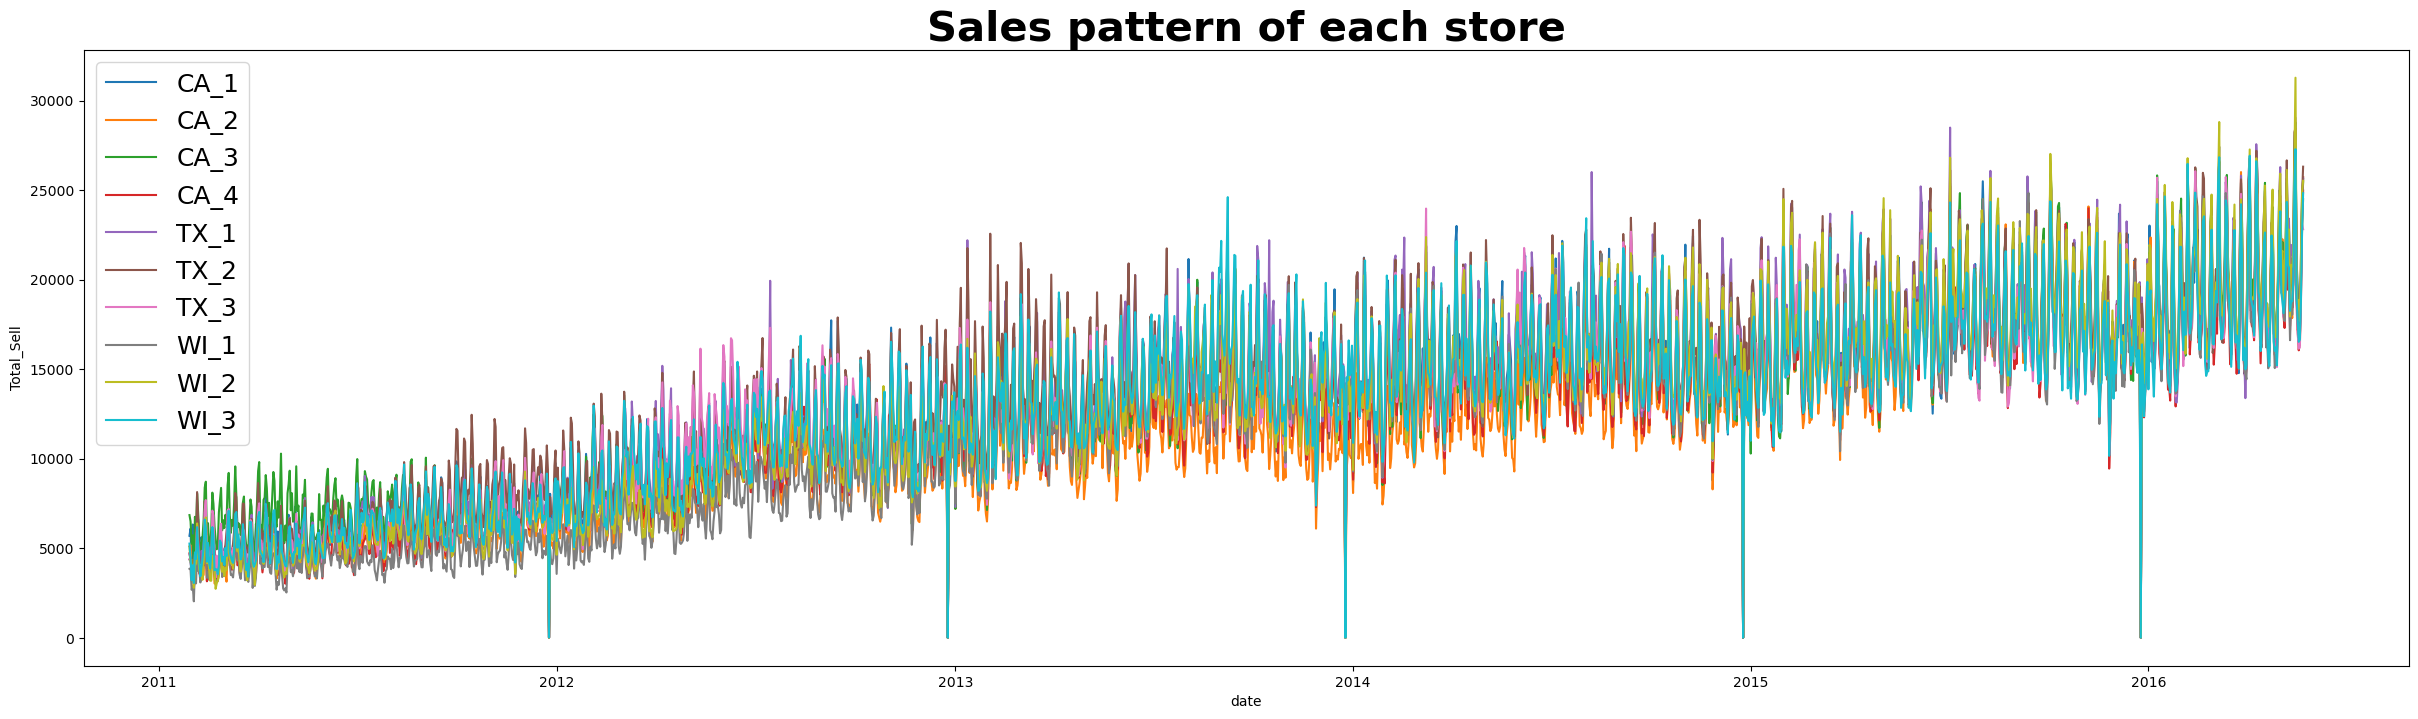

In [157]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="store_id",
             data=data_Overall_Store)
plt.legend( prop ={'size':18})
plt.title("Sales pattern of each store", fontsize = 30, weight = 'bold')
plt.show()

The daily items being sold per store seems to have very simialr pattern across all the stores.

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


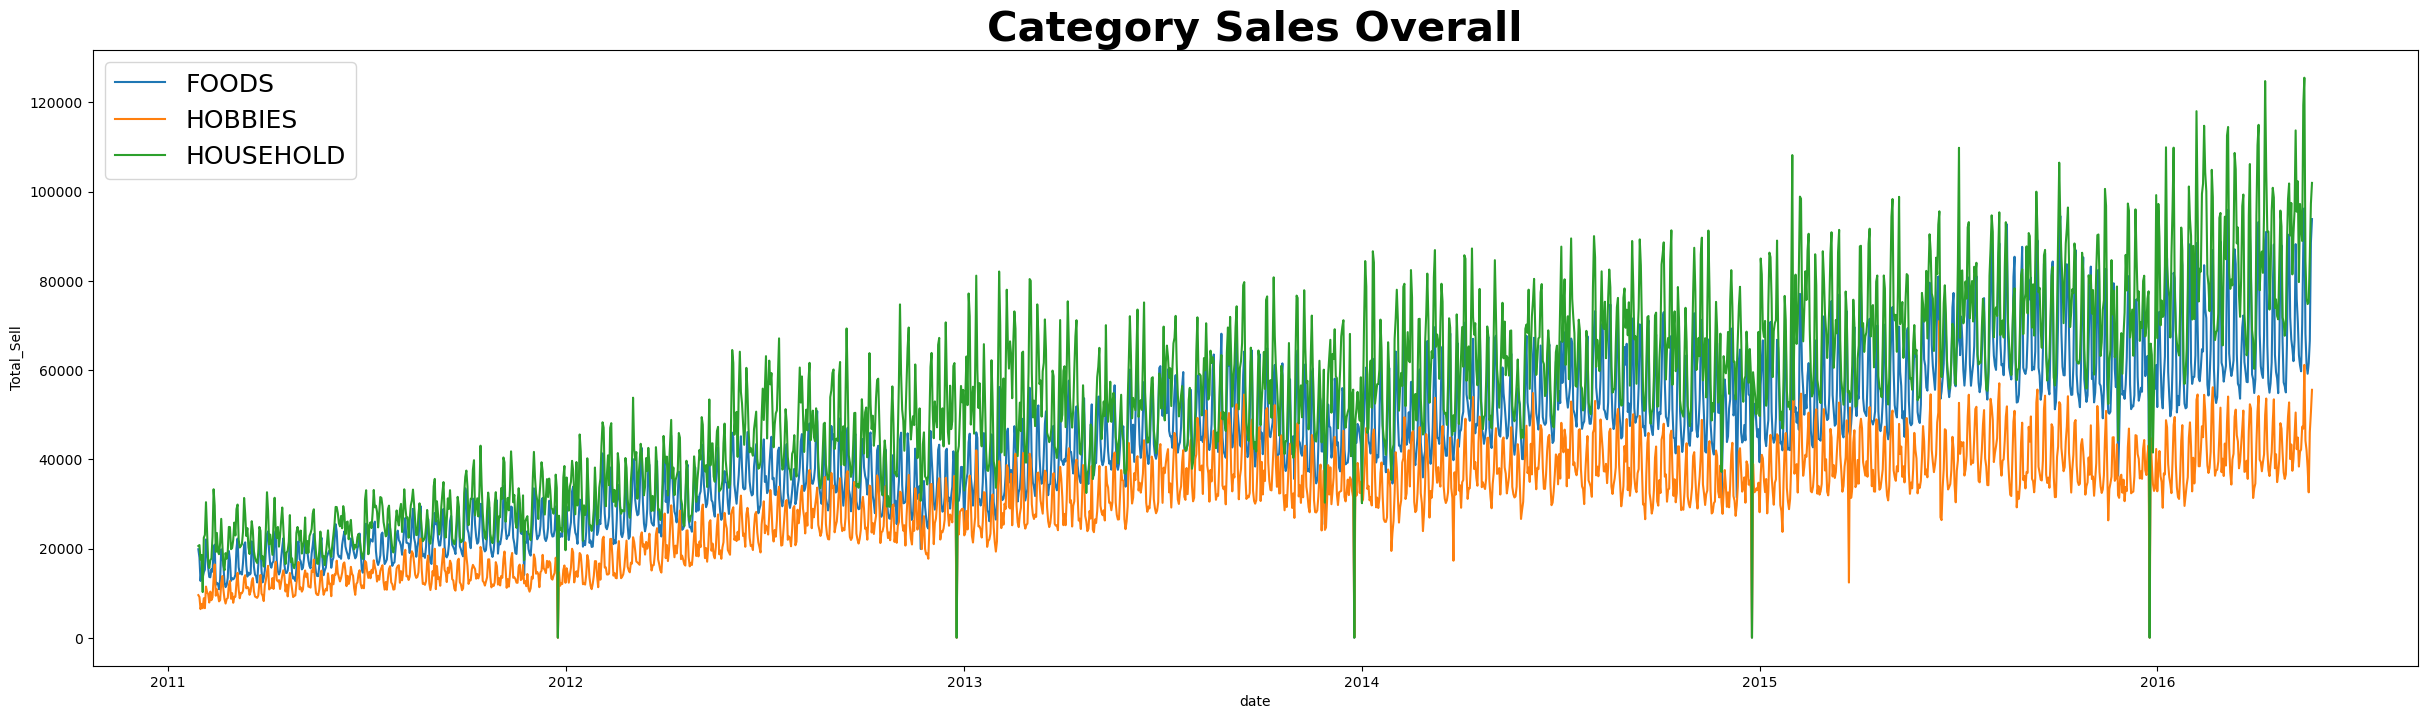

In [151]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="cat_id",
             data=total_sales_by_store_category)
plt.legend( prop ={'size':18})
plt.title("Category Sales Overall", fontsize = 30, weight = 'bold')
plt.show()

In [22]:
def plot_Event_Type_one(data):
    event_list = ['Sporting', 'Cultural', 'National', 'Religious']
    for event in event_list:
        if event in data['event_type_1'].unique():
            
            event_date = data[['date',"event_type_1"]].loc[(data["event_type_1"] == event)]
            if (event == 'Sporting'):
                plt.vlines(x = event_date['date'], ymin=0, ymax=120000, label = event, color = 'red')
            elif (event == 'Cultural'):
                plt.vlines(x = event_date['date'], ymin=0, ymax=120000, label = event, color = 'blue')        
            elif (event == 'National'):
                plt.vlines(x = event_date['date'], ymin=0, ymax=120000, label = event, color = 'black')       
            elif (event == 'Religious'):
                plt.vlines(x = event_date['date'], ymin=0, ymax=120000, label = event, color = 'purple')       
    plt.legend(prop ={'size':18}, loc = 'lower right')

In [23]:
event1_date = df[['date',"event_type_1"]].loc[(df["event_type_1"] != "No_Event")]
event2_date = df[['date',"event_type_2"]].loc[(df["event_type_2"] != "No_Event")]

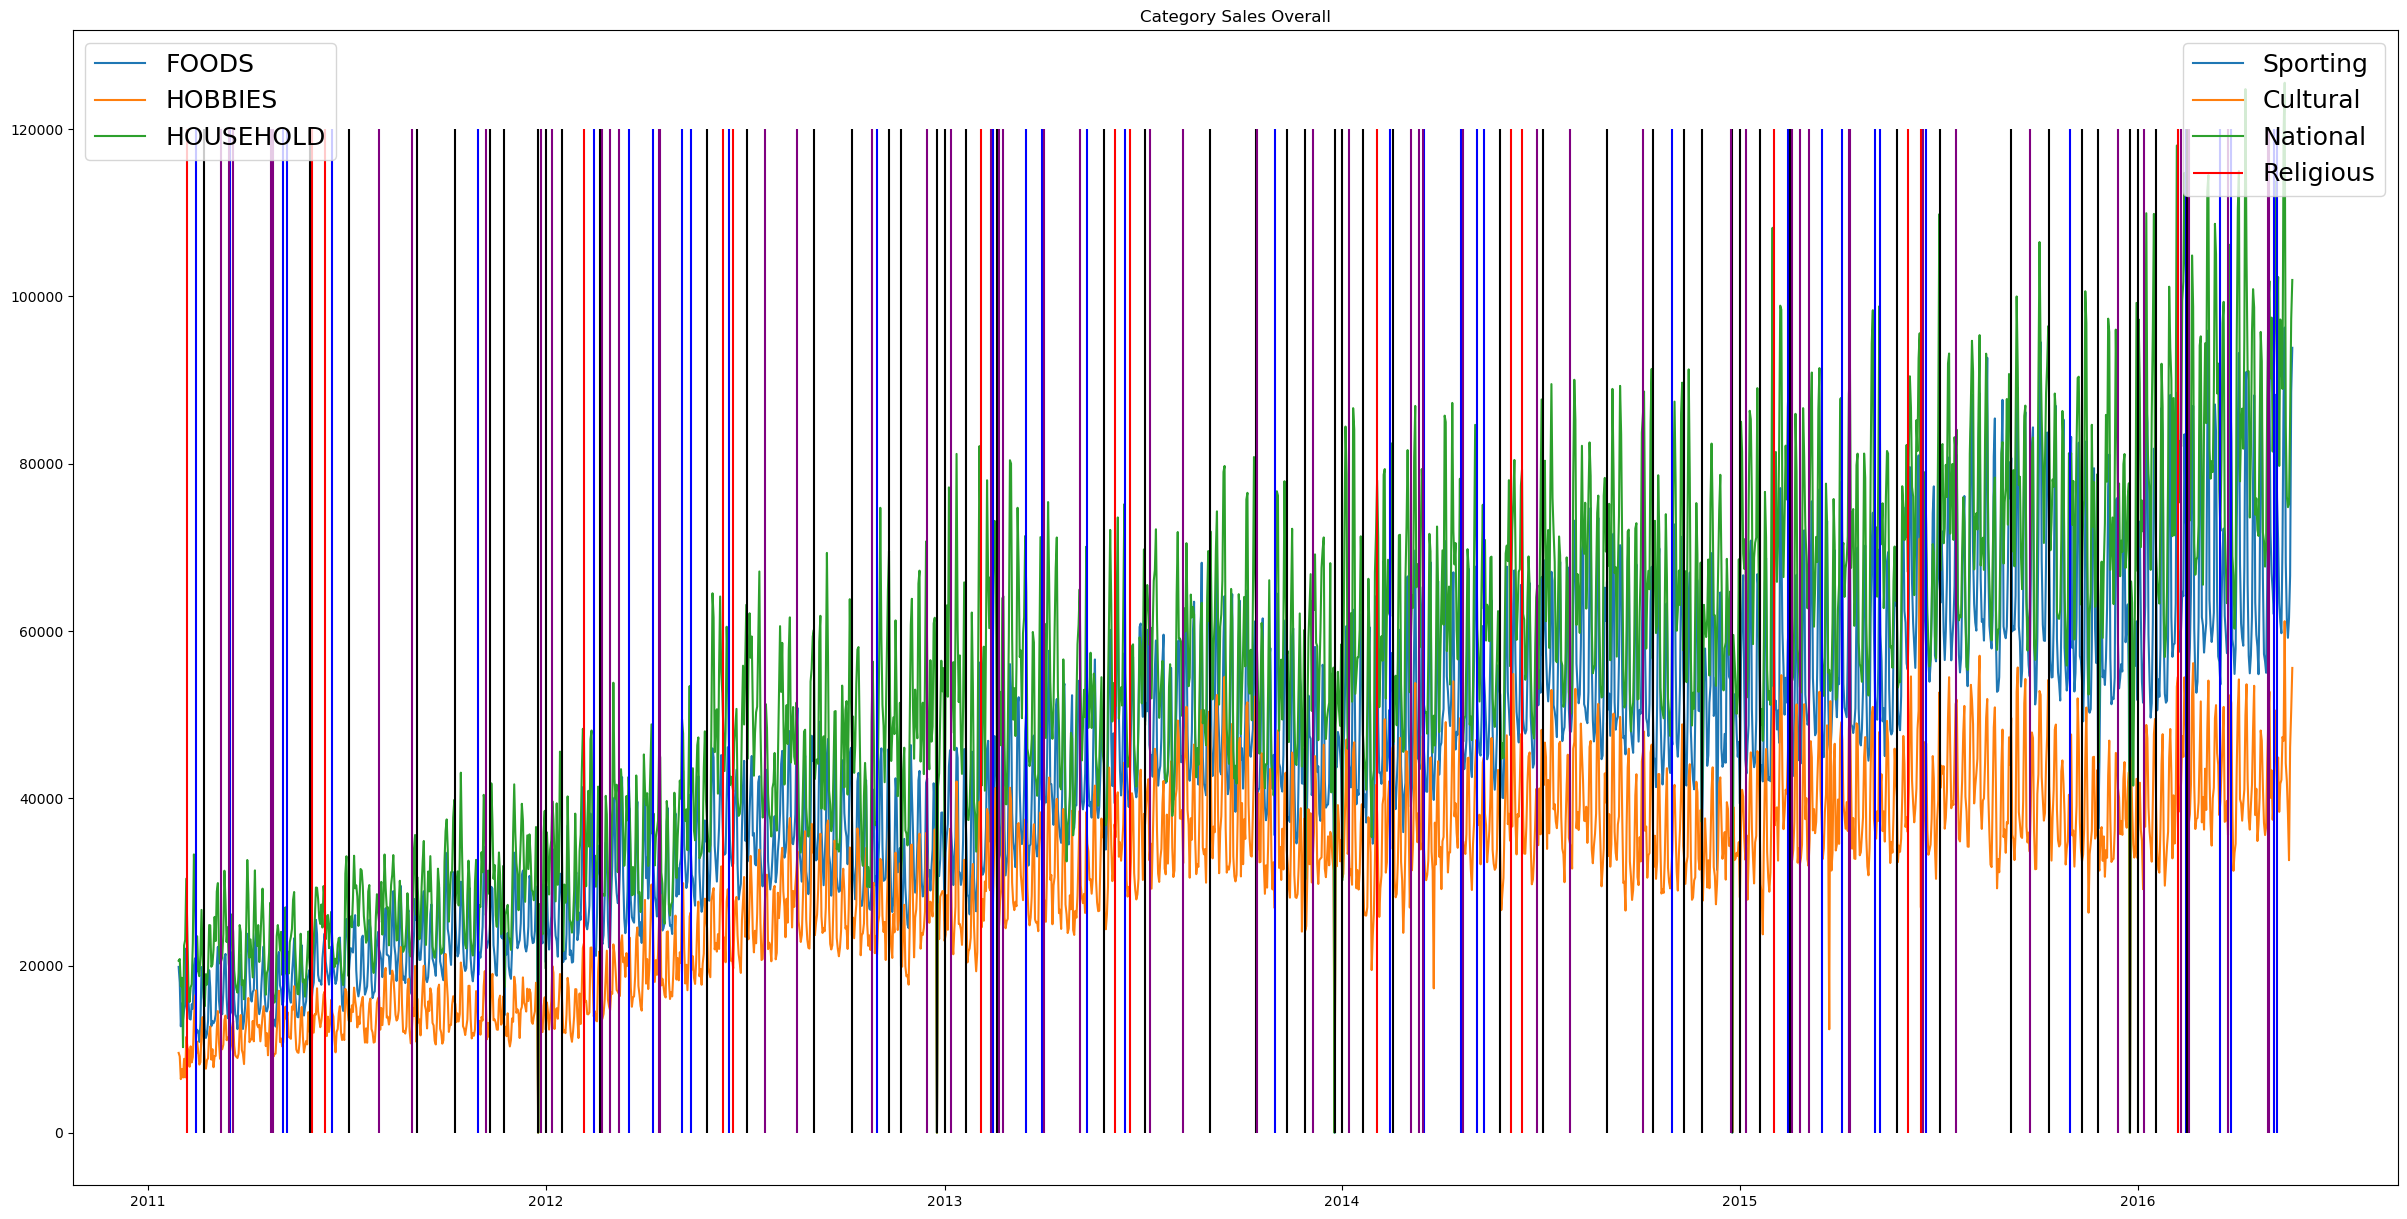

In [24]:
plt.figure(figsize=(30, 15))
plt.plot(total_sales_by_store_category)

plt.title("Category Sales Overall", fontsize = 30, weight = 'bold')
legend1 = plt.legend(data_melt_and_ids['cat_id'].unique(), prop ={'size':18}, loc = 'upper left')

plot_Event_Type_one(event1_date)
plt.legend(event1_date['event_type_1'].unique(), prop ={'size':18}, loc = 'upper right')
plt.gca().add_artist(legend1)
plt.show()

In [25]:
event1_date['date'] = pd.to_datetime(event1_date['date'])
event1_date_2015 = event1_date.loc[event1_date['date'] >= '2015/01/01']
total_sales_by_store_category_2015 = data_melt_and_ids.loc[data_melt_and_ids['date'] >='2015/01/01'].groupby(['date','cat_id'])['Daily_total_sales'].sum().unstack()

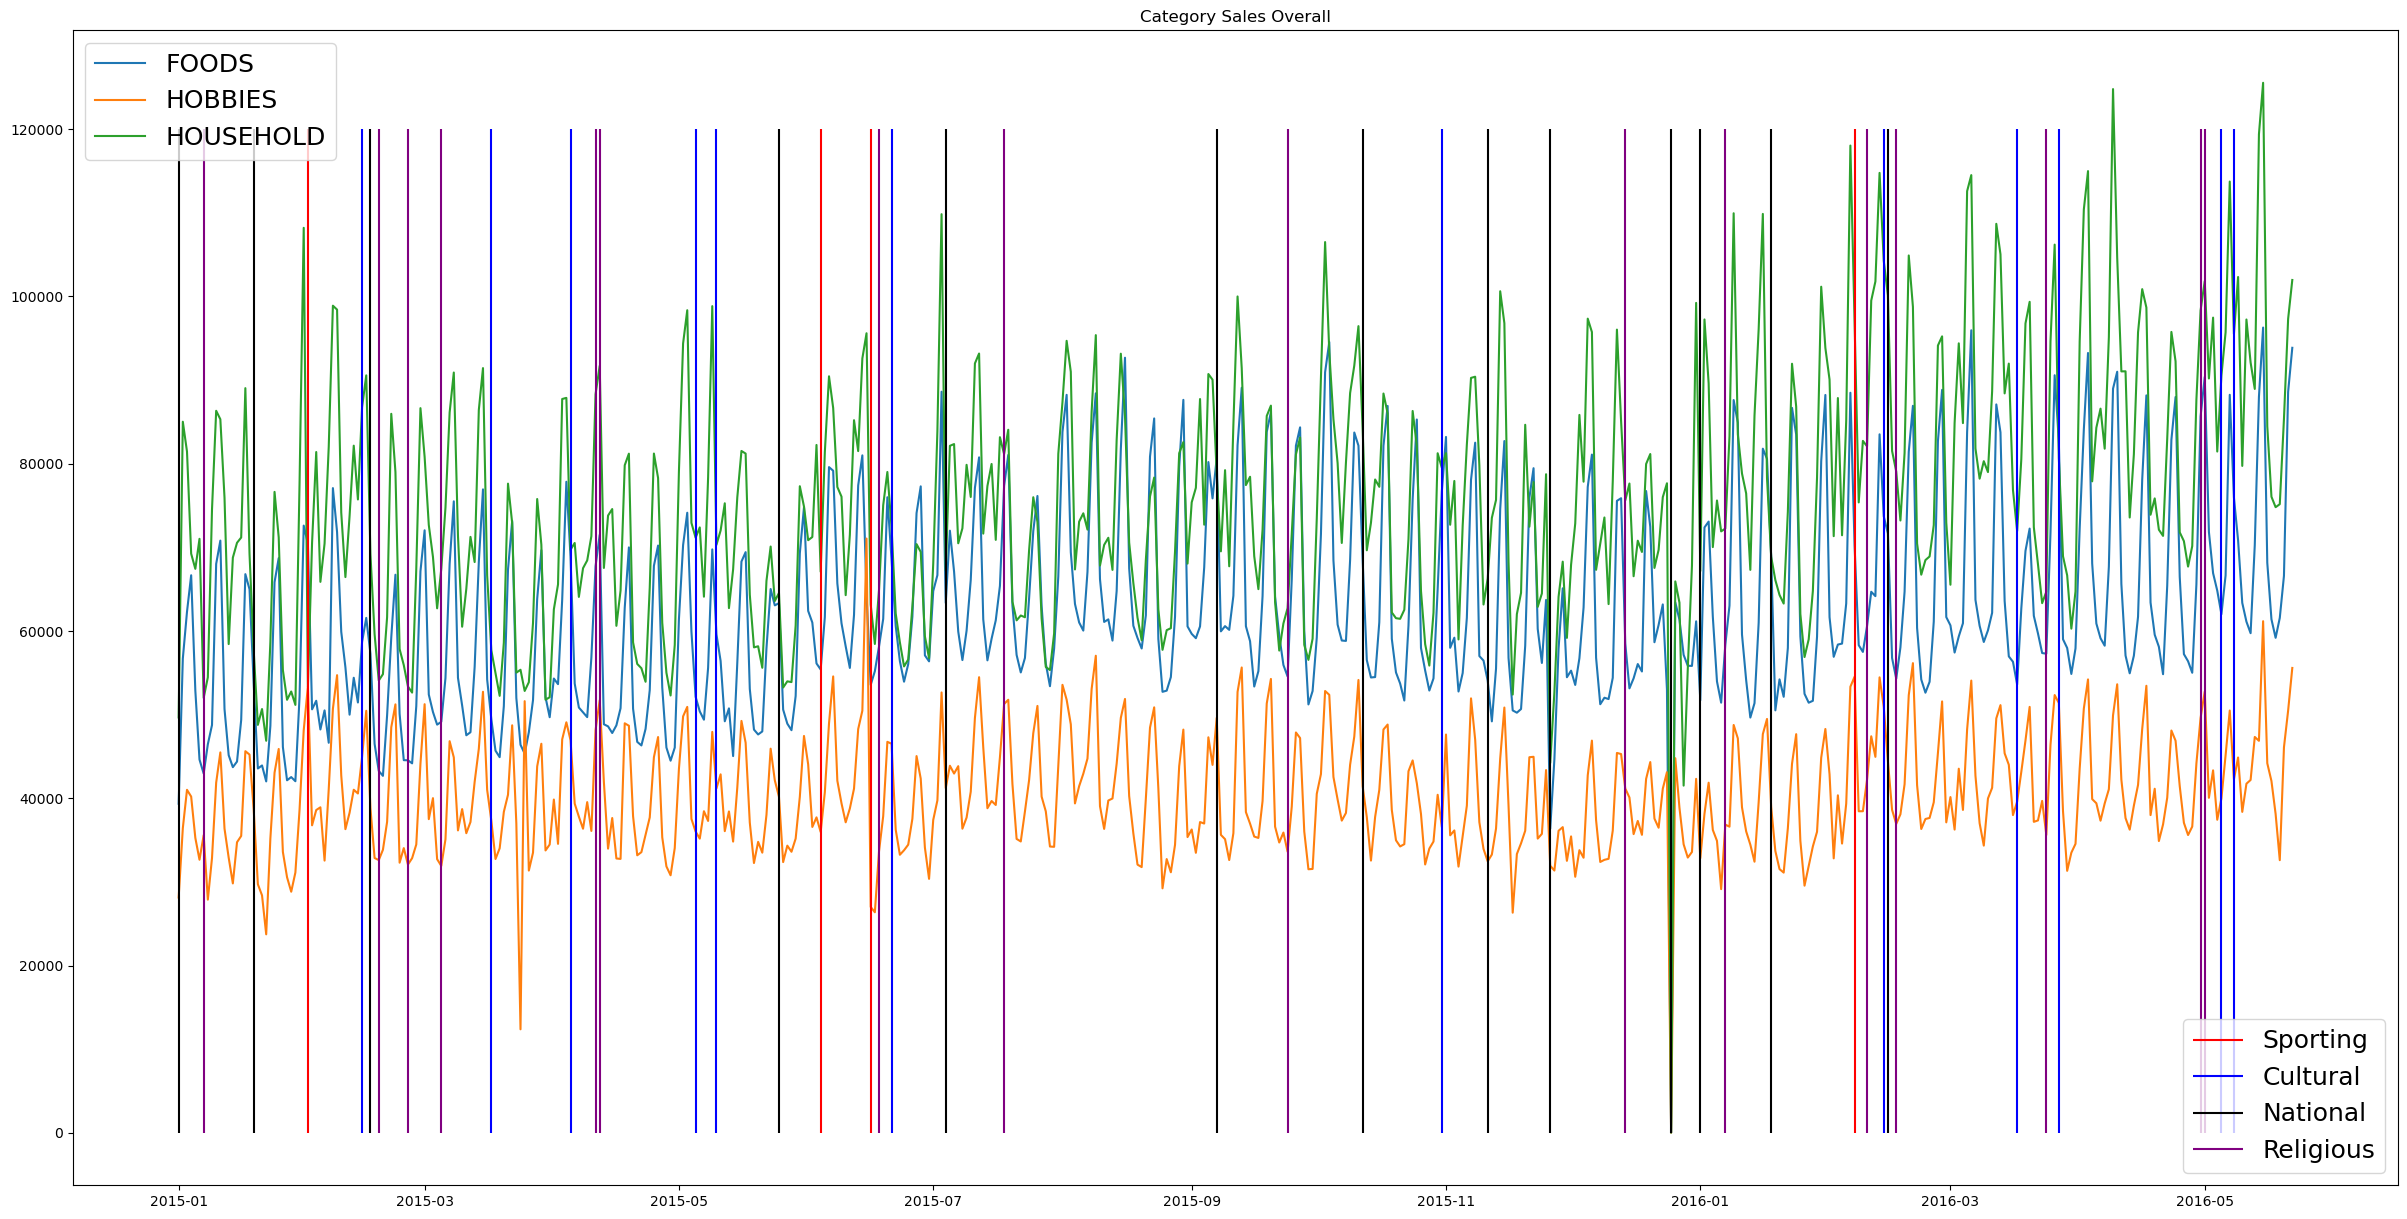

In [26]:
plt.figure(figsize=(30, 15))
plt.plot(total_sales_by_store_category_2015)

plt.title("Category Sales Overall", fontsize = 30, weight = 'bold')
legend1 = plt.legend(data_melt_and_ids['cat_id'].unique(), prop ={'size':18}, loc = 'upper left')

plot_Event_Type_one(event1_date_2015)
plt.gca().add_artist(legend1)
plt.show()

In [56]:
data_merge_calender = data_melt_and_ids.merge(df_calender, on = 'date')

In [57]:
data_merge_calender = data_merge_calender.drop(['wm_yr_wk_shift','d_num','d_shift'], axis = 1)
data_merge_calender = data_merge_calender.rename(columns={'Unnamed: 0': 'd'})
data_merge_calender

id       date  Daily_total_sales  \
0             FOODS_1_001_CA_1_evaluation 2011-01-29               0.00   
1             FOODS_1_001_CA_2_evaluation 2011-01-29               0.00   
2             FOODS_1_001_CA_3_evaluation 2011-01-29               0.00   
3             FOODS_1_001_CA_4_evaluation 2011-01-29               0.00   
4             FOODS_1_001_TX_1_evaluation 2011-01-29               0.00   
...                                   ...        ...                ...   
59181085  HOUSEHOLD_2_516_TX_2_evaluation 2016-05-22               5.94   
59181086  HOUSEHOLD_2_516_TX_3_evaluation 2016-05-22               0.00   
59181087  HOUSEHOLD_2_516_WI_1_evaluation 2016-05-22              11.88   
59181088  HOUSEHOLD_2_516_WI_2_evaluation 2016-05-22               0.00   
59181089  HOUSEHOLD_2_516_WI_3_evaluation 2016-05-22               5.94   

                  item_id      dept_id     cat_id store_id state_id     d  \
0             FOODS_1_001      FOODS_1      FOODS     CA_1       CA     0   
1             FOODS_1_001      FOODS_1      FOODS     CA_2       CA     0   
2             FOODS_1_001      FOODS_1      FOODS     CA_3       CA     0   
3             FOODS_1_001      FOODS_1      FOODS     CA_4       CA     0   
4             FOODS_1_001      FOODS_1      FOODS     TX_1       TX     0   
...                   ...          ...        ...      ...      ...   ...   
59181085  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     TX_2       TX  1940   
59181086  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     TX_3       TX  1940   
59181087  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     WI_1       WI  1940   
59181088  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     WI_2       WI  1940   
59181089  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     WI_3       WI  1940   

          wm_yr_wk  ... month  year       d  event_name_1 event_type_1  \
0            11101  ...     1  2011     d_1      No_Event     No_Event   
1            11101  ...     1  2011     d_1      No_Event     No_Event   
2            11101  ...     1  2011     d_1      No_Event     No_Event   
3            11101  ...     1  2011     d_1      No_Event     No_Event   
4            11101  ...     1  2011     d_1      No_Event     No_Event   
...            ...  ...   ...   ...     ...           ...          ...   
59181085     11617  ...     5  2016  d_1941      No_Event     No_Event   
59181086     11617  ...     5  2016  d_1941      No_Event     No_Event   
59181087     11617  ...     5  2016  d_1941      No_Event     No_Event   
59181088     11617  ...     5  2016  d_1941      No_Event     No_Event   
59181089     11617  ...     5  2016  d_1941      No_Event     No_Event   

         event_name_2 event_type_2 snap_CA snap_TX  snap_WI  
0            No_Event     No_Event       0       0        0  
1            No_Event     No_Event       0       0        0  
2            No_Event     No_Event       0       0        0  
3            No_Event     No_Event       0       0        0  
4            No_Event     No_Event       0       0        0  
...               ...          ...     ...     ...      ...  
59181085     No_Event     No_Event       0       0        0  
59181086     No_Event     No_Event       0       0        0  
59181087     No_Event     No_Event       0       0        0  
59181088     No_Event     No_Event       0       0        0  
59181089     No_Event     No_Event       0       0        0  

[59181090 rows x 22 columns]

In [90]:

data_merge_calender['snap_CA'] = data_merge_calender['snap_CA'].replace(['0', '1'], ['SNAP_not_available', 'SNAP_available'])
data_merge_calender

id       date  Daily_total_sales  \
0             FOODS_1_001_CA_1_evaluation 2011-01-29               0.00   
1             FOODS_1_001_CA_2_evaluation 2011-01-29               0.00   
2             FOODS_1_001_CA_3_evaluation 2011-01-29               0.00   
3             FOODS_1_001_CA_4_evaluation 2011-01-29               0.00   
4             FOODS_1_001_TX_1_evaluation 2011-01-29               0.00   
...                                   ...        ...                ...   
59181085  HOUSEHOLD_2_516_TX_2_evaluation 2016-05-22               5.94   
59181086  HOUSEHOLD_2_516_TX_3_evaluation 2016-05-22               0.00   
59181087  HOUSEHOLD_2_516_WI_1_evaluation 2016-05-22              11.88   
59181088  HOUSEHOLD_2_516_WI_2_evaluation 2016-05-22               0.00   
59181089  HOUSEHOLD_2_516_WI_3_evaluation 2016-05-22               5.94   

                  item_id      dept_id     cat_id store_id state_id     d  \
0             FOODS_1_001      FOODS_1      FOODS     CA_1       CA     0   
1             FOODS_1_001      FOODS_1      FOODS     CA_2       CA     0   
2             FOODS_1_001      FOODS_1      FOODS     CA_3       CA     0   
3             FOODS_1_001      FOODS_1      FOODS     CA_4       CA     0   
4             FOODS_1_001      FOODS_1      FOODS     TX_1       TX     0   
...                   ...          ...        ...      ...      ...   ...   
59181085  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     TX_2       TX  1940   
59181086  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     TX_3       TX  1940   
59181087  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     WI_1       WI  1940   
59181088  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     WI_2       WI  1940   
59181089  HOUSEHOLD_2_516  HOUSEHOLD_2  HOUSEHOLD     WI_3       WI  1940   

          wm_yr_wk  ... month  year       d  event_name_1 event_type_1  \
0            11101  ...     1  2011     d_1      No_Event     No_Event   
1            11101  ...     1  2011     d_1      No_Event     No_Event   
2            11101  ...     1  2011     d_1      No_Event     No_Event   
3            11101  ...     1  2011     d_1      No_Event     No_Event   
4            11101  ...     1  2011     d_1      No_Event     No_Event   
...            ...  ...   ...   ...     ...           ...          ...   
59181085     11617  ...     5  2016  d_1941      No_Event     No_Event   
59181086     11617  ...     5  2016  d_1941      No_Event     No_Event   
59181087     11617  ...     5  2016  d_1941      No_Event     No_Event   
59181088     11617  ...     5  2016  d_1941      No_Event     No_Event   
59181089     11617  ...     5  2016  d_1941      No_Event     No_Event   

         event_name_2 event_type_2 snap_CA snap_TX  snap_WI  
0            No_Event     No_Event       0       0        0  
1            No_Event     No_Event       0       0        0  
2            No_Event     No_Event       0       0        0  
3            No_Event     No_Event       0       0        0  
4            No_Event     No_Event       0       0        0  
...               ...          ...     ...     ...      ...  
59181085     No_Event     No_Event       0       0        0  
59181086     No_Event     No_Event       0       0        0  
59181087     No_Event     No_Event       0       0        0  
59181088     No_Event     No_Event       0       0        0  
59181089     No_Event     No_Event       0       0        0  

[59181090 rows x 22 columns]

In [58]:
data_total_sell_by_weekday = data_merge_calender.groupby('weekday')['Daily_total_sales'].sum().to_frame('Total_Sell')
data_total_sell_by_weekday

Total_Sell
weekday               
Friday     35708465.60
Monday     34102991.22
Saturday   43413549.65
Sunday     42962931.87
Thursday   31586350.23
Tuesday    31649518.04
Wednesday  31386351.28

In [59]:
data_merge_calender_date = data_merge_calender.groupby('date')['Daily_total_sales'].sum().to_frame('Total_sell_per_day')
data_merge_calender_date = data_merge_calender_date.merge(df_calender[['date', 'weekday']], on = 'date')

In [206]:
data_merge_calender_date

date  Total_sell_per_day    weekday
0    2011-01-29            49954.04   Saturday
1    2011-01-30            47885.24     Sunday
2    2011-01-31            36656.06     Monday
3    2011-02-01            41598.37    Tuesday
4    2011-02-02            30393.59  Wednesday
...         ...                 ...        ...
1936 2016-05-18           172110.23  Wednesday
1937 2016-05-19           169323.28   Thursday
1938 2016-05-20           198025.90     Friday
1939 2016-05-21           236365.38   Saturday
1940 2016-05-22           251411.96     Sunday

[1941 rows x 3 columns]

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


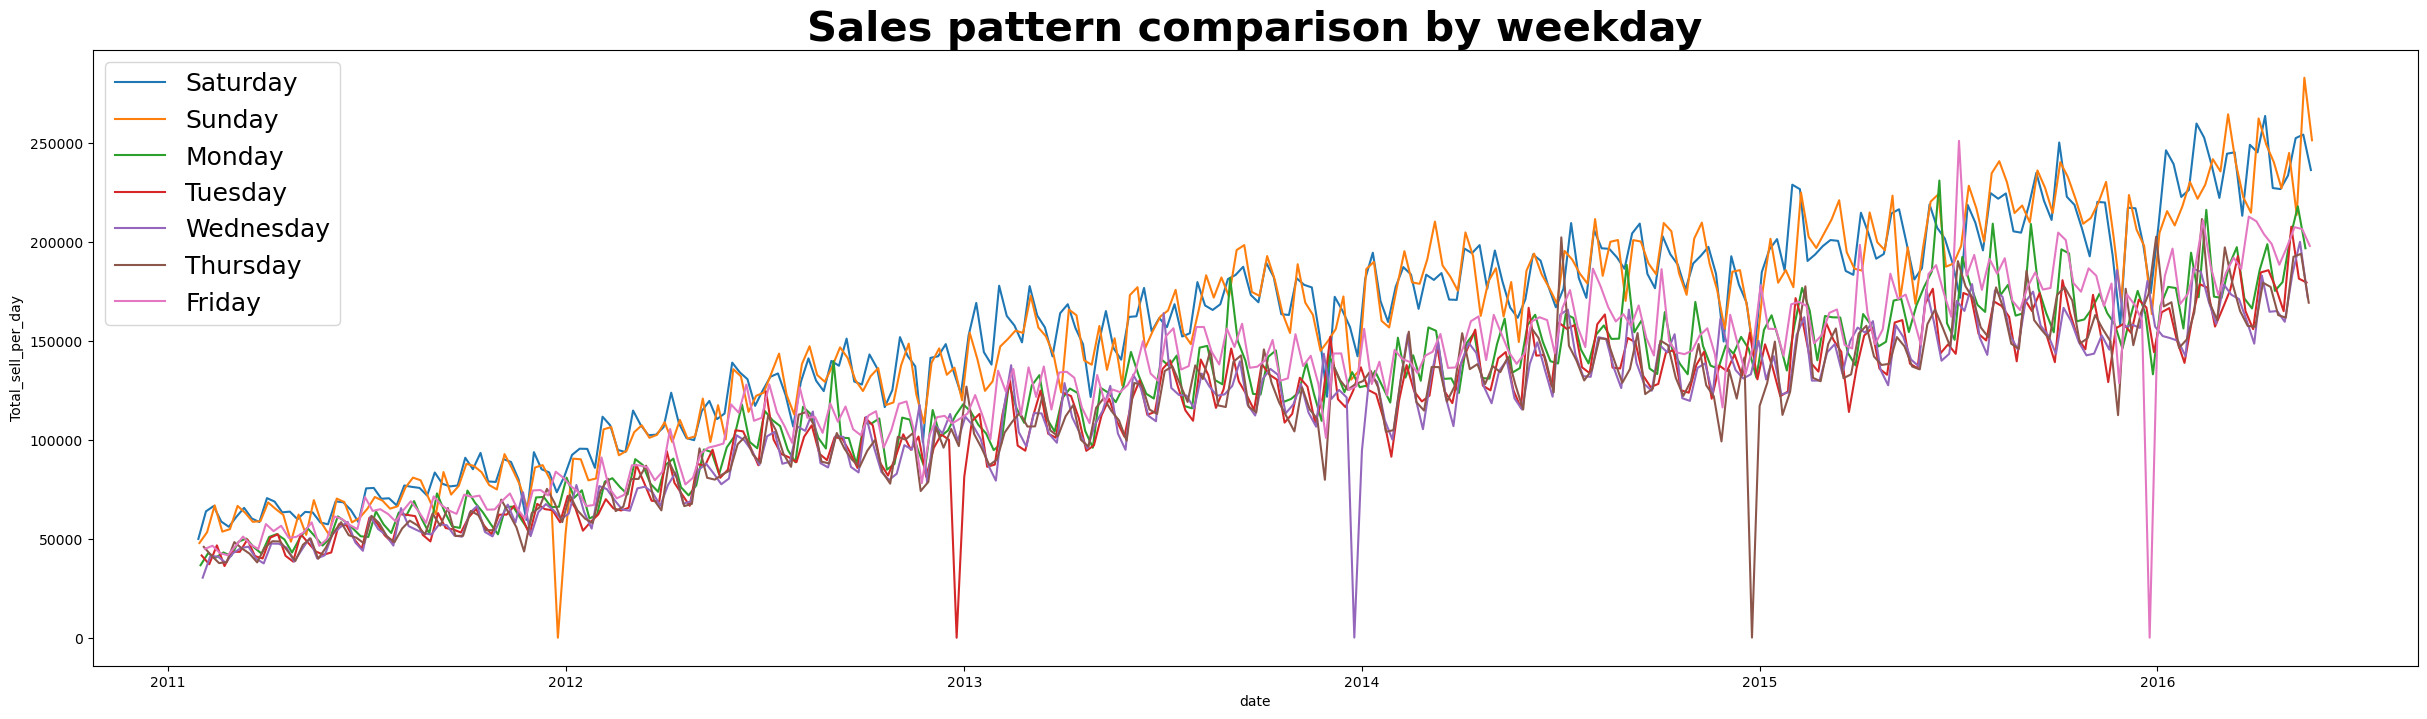

In [207]:
weekday = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_sell_per_day",
             hue="weekday",
             data=data_merge_calender_date)
plt.legend(prop ={'size':18})
plt.title("Sales pattern comparison by weekday", fontsize = 30, weight = 'bold')
plt.show()

In [178]:
data_merge_calender_date_CA = data_merge_calender.loc[data_merge_calender['state_id'] == 'CA'].groupby('date')['Daily_total_sales'].sum().to_frame('Total_sell_per_day')
data_merge_calender_date_CA = data_merge_calender_date_CA.merge(df_calender[['date', 'snap_CA']], on = 'date')
data_merge_calender_date_CA['snap_CA'] = data_merge_calender_date_CA['snap_CA'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_merge_calender_date_WI = data_merge_calender.loc[data_merge_calender['state_id'] == 'WI'].groupby('date')['Daily_total_sales'].sum().to_frame('Total_sell_per_day')
data_merge_calender_date_WI = data_merge_calender_date_WI.merge(df_calender[['date', 'snap_WI']], on = 'date')
data_merge_calender_date_WI['snap_WI'] = data_merge_calender_date_WI['snap_WI'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_merge_calender_date_TX = data_merge_calender.loc[data_merge_calender['state_id'] == 'TX'].groupby('date')['Daily_total_sales'].sum().to_frame('Total_sell_per_day')
data_merge_calender_date_TX = data_merge_calender_date_TX.merge(df_calender[['date', 'snap_TX']], on = 'date')
data_merge_calender_date_TX['snap_TX'] = data_merge_calender_date_TX['snap_TX'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


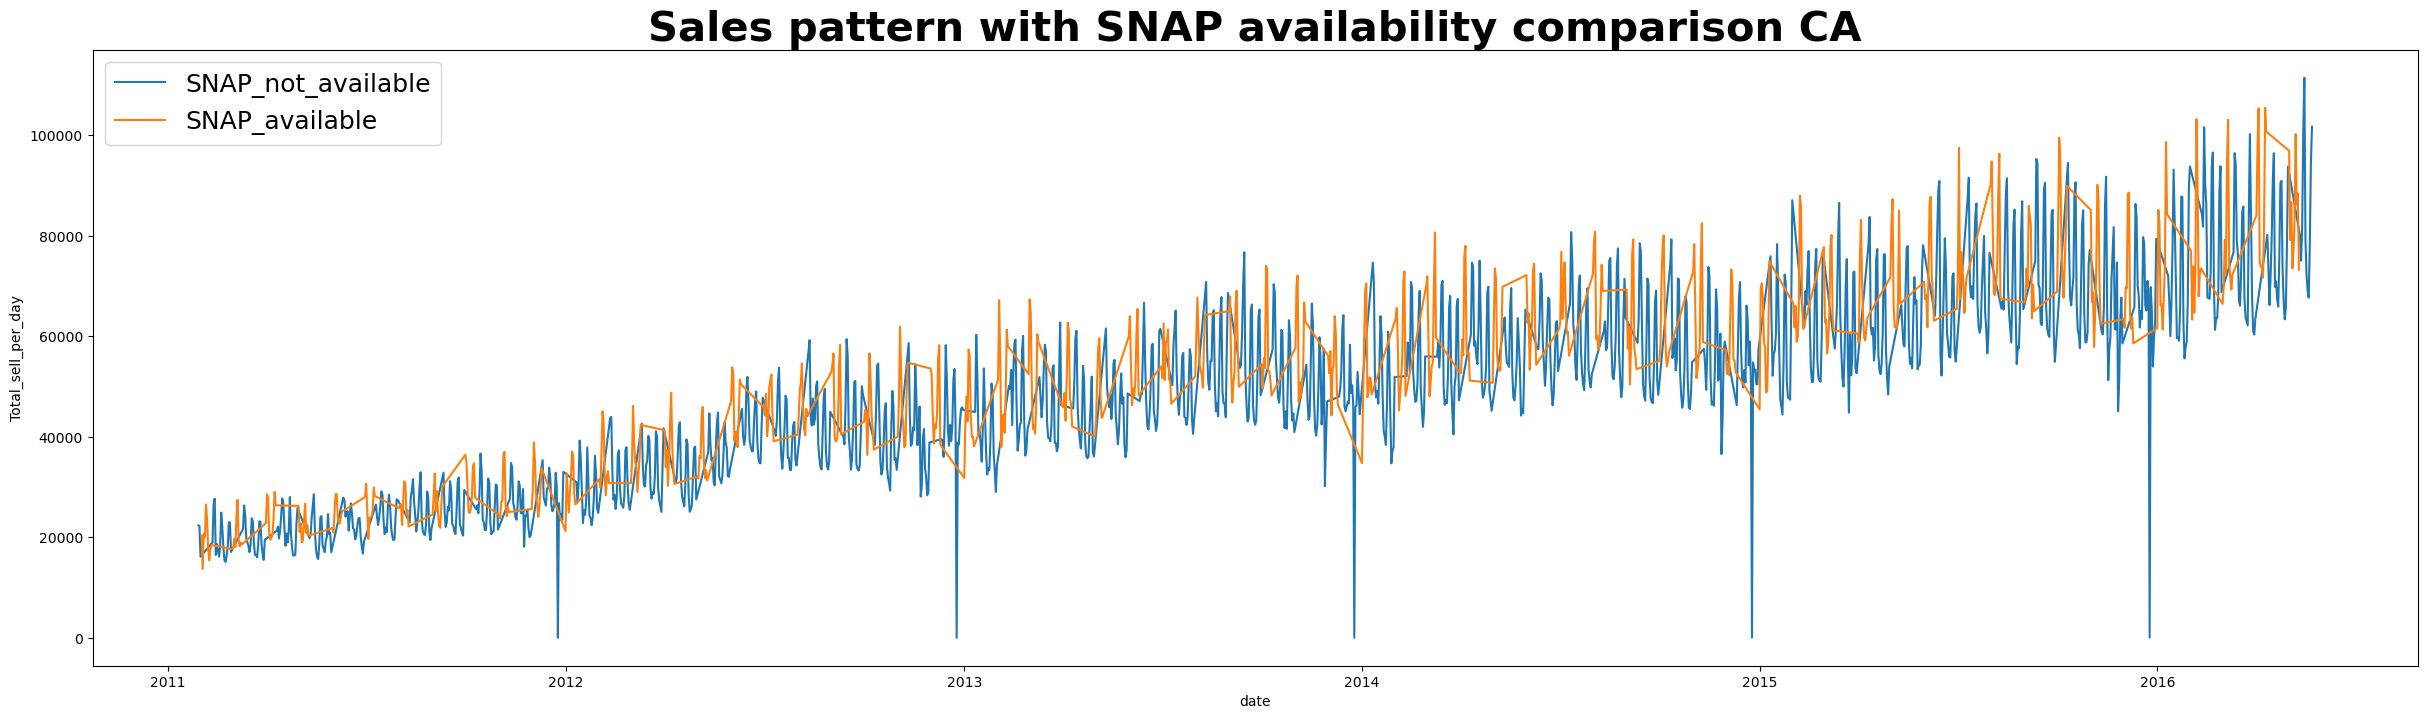

In [179]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_sell_per_day",
             hue="snap_CA",
             data=data_merge_calender_date_CA)
plt.legend( prop ={'size':18})
plt.title("Sales pattern with SNAP availability comparison CA", fontsize = 30, weight = 'bold')
plt.show()

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.0, 'Texas')

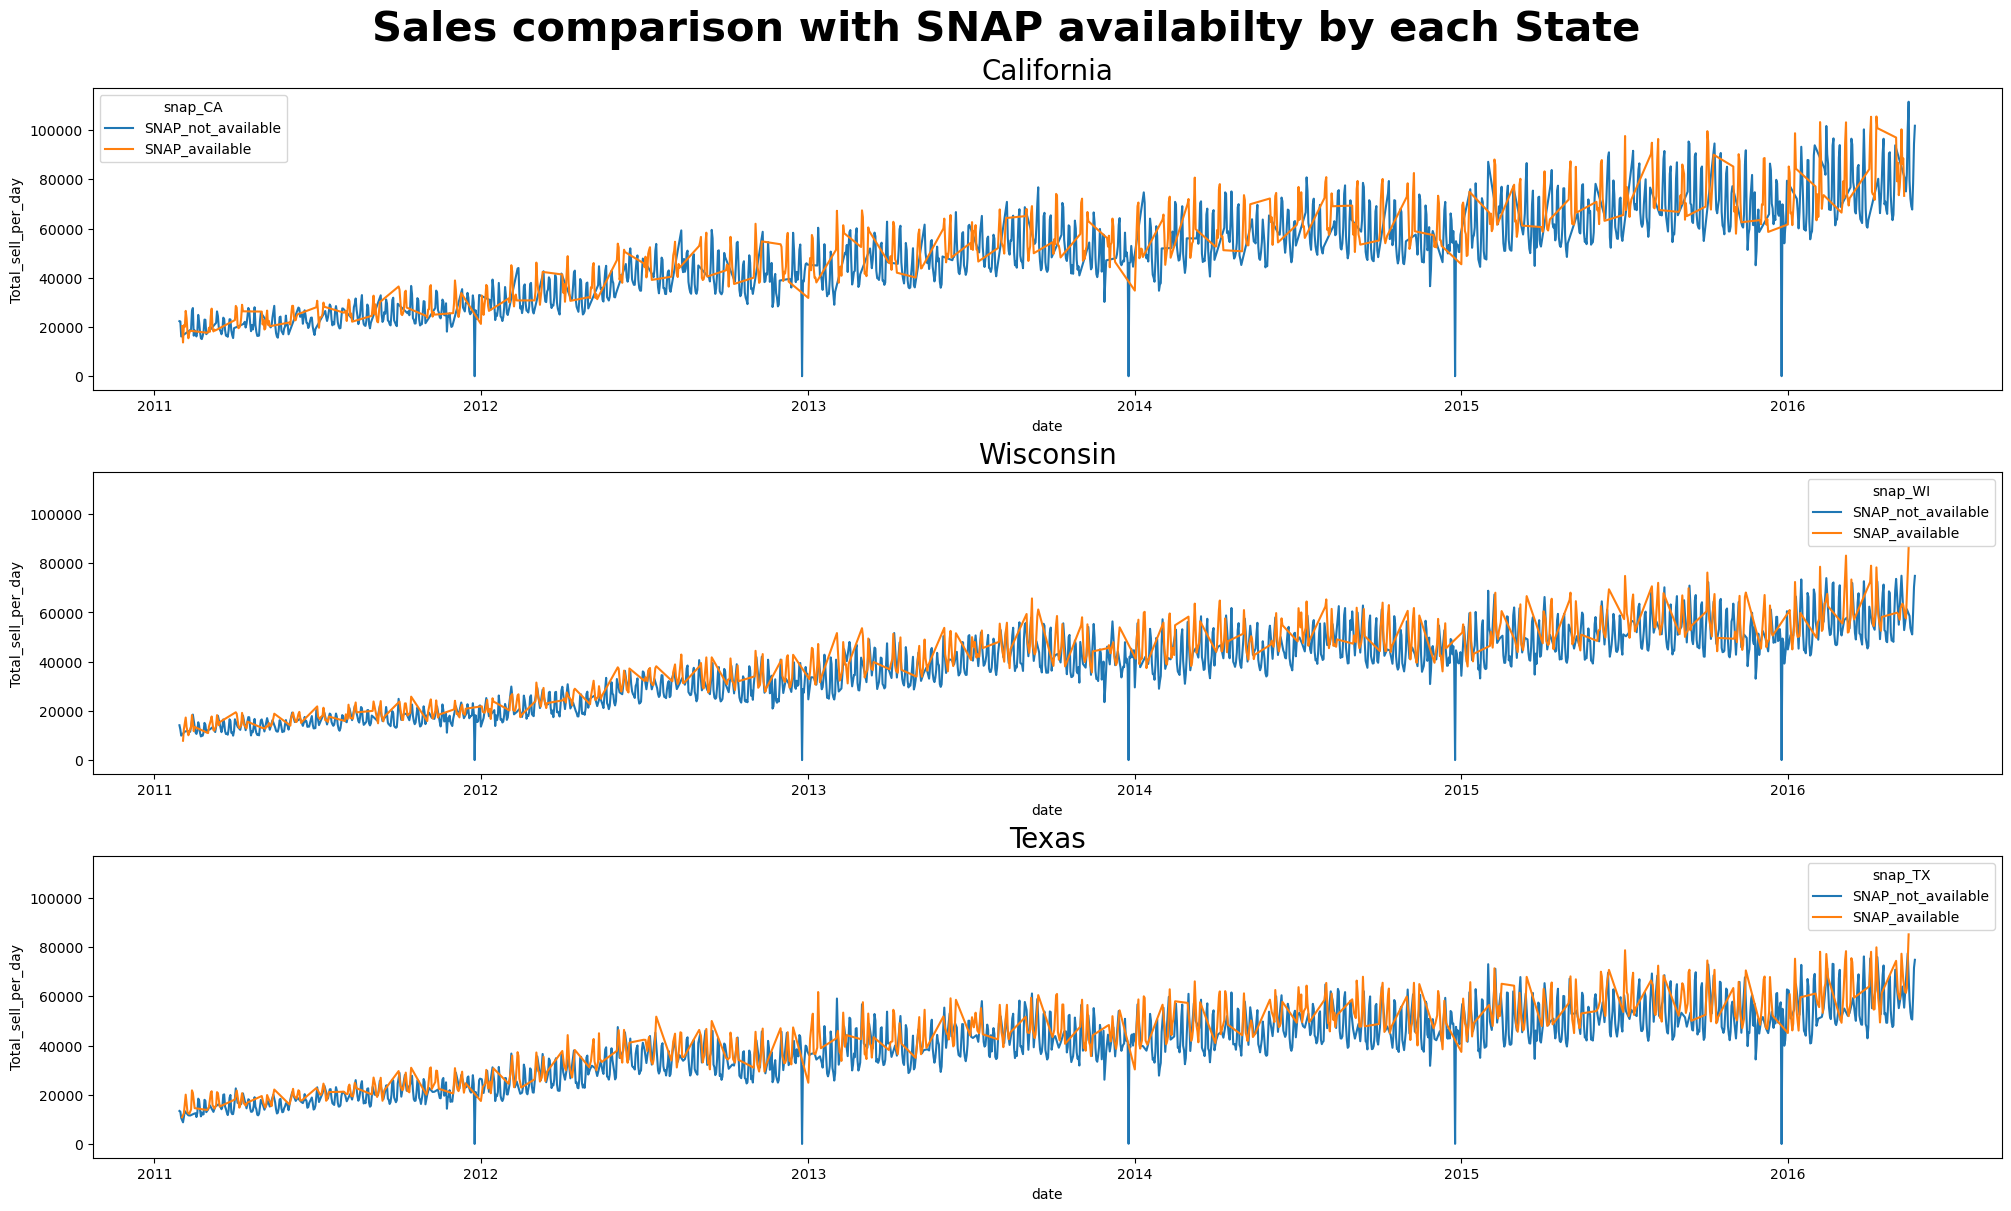

In [180]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales comparison with SNAP availabilty by each State', fontsize = 30, weight = 'bold')

snap_graph_CA = sns.lineplot(x = "date", y = "Total_sell_per_day", hue="snap_CA", data = data_merge_calender_date_CA, 
             ax = ax[0]) 
snap_graph_CA.set_title('California', size = 20, weight = 'bold')
snap_graph_WI =sns.lineplot(x = "date", y = "Total_sell_per_day", hue="snap_WI",  data = data_merge_calender_date_WI, 
             ax = ax[1]) 
snap_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')
snap_graph_TX =sns.lineplot(x = "date", y = "Total_sell_per_day", hue="snap_TX", data = data_merge_calender_date_TX, 
             ax = ax[2]) 
snap_graph_TX.set_title('Texas', size = 20, weight = 'bold')

In [181]:
data_merge_calender_date_cat_CA = data_merge_calender.loc[data_merge_calender['state_id'] == 'CA'].groupby(['date','cat_id'])['Daily_total_sales'].sum().to_frame('Total_sell_per_day').reset_index()
data_merge_calender_date_cat_CA = data_merge_calender_date_cat_CA.merge(df_calender[['date', 'snap_CA']], on = 'date')
data_merge_calender_date_cat_CA['snap_CA'] = data_merge_calender_date_cat_CA['snap_CA'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_merge_calender_date_cat_WI = data_merge_calender.loc[data_merge_calender['state_id'] == 'WI'].groupby(['date','cat_id'])['Daily_total_sales'].sum().to_frame('Total_sell_per_day').reset_index()
data_merge_calender_date_cat_WI = data_merge_calender_date_cat_WI.merge(df_calender[['date', 'snap_WI']], on = 'date')
data_merge_calender_date_cat_WI['snap_WI'] = data_merge_calender_date_cat_WI['snap_WI'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_merge_calender_date_cat_TX = data_merge_calender.loc[data_merge_calender['state_id'] == 'TX'].groupby(['date','cat_id'])['Daily_total_sales'].sum().to_frame('Total_sell_per_day').reset_index()
data_merge_calender_date_cat_TX = data_merge_calender_date_cat_TX.merge(df_calender[['date', 'snap_TX']], on = 'date')
data_merge_calender_date_cat_TX['snap_TX'] = data_merge_calender_date_cat_TX['snap_TX'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

In [202]:
data_merge_calender_date_cat_CA['cat_id_SNAP'] = data_merge_calender_date_cat_CA['cat_id'] +'_'+data_merge_calender_date_cat_CA['snap_CA']
data_merge_calender_date_cat_WI['cat_id_SNAP'] = data_merge_calender_date_cat_WI['cat_id'] +'_'+data_merge_calender_date_cat_WI['snap_WI']
data_merge_calender_date_cat_TX['cat_id_SNAP'] = data_merge_calender_date_cat_TX['cat_id'] +'_'+data_merge_calender_date_cat_TX['snap_TX']

In [186]:
# data_merge_calender_date_cat_CA_SNAP_ON = data_merge_calender_date_cat_CA.loc[data_merge_calender_date_cat_CA['snap_CA'] == 'SNAP_available']
# data_merge_calender_date_cat_CA_SNAP_OFF = data_merge_calender_date_cat_CA.loc[data_merge_calender_date_cat_CA['snap_CA'] == 'SNAP_not_available']
# data_merge_calender_date_cat_WI_SNAP_ON = data_merge_calender_date_cat_WI.loc[data_merge_calender_date_cat_WI['snap_WI'] == 'SNAP_available']
# data_merge_calender_date_cat_WI_SNAP_OFF = data_merge_calender_date_cat_WI.loc[data_merge_calender_date_cat_WI['snap_WI'] == 'SNAP_not_available']
# data_merge_calender_date_cat_TX_SNAP_ON = data_merge_calender_date_cat_TX.loc[data_merge_calender_date_cat_TX['snap_TX'] == 'SNAP_available']
# data_merge_calender_date_cat_TX_SNAP_OFF = data_merge_calender_date_cat_TX.loc[data_merge_calender_date_cat_TX['snap_TX'] == 'SNAP_not_available']

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.0, 'Texas')

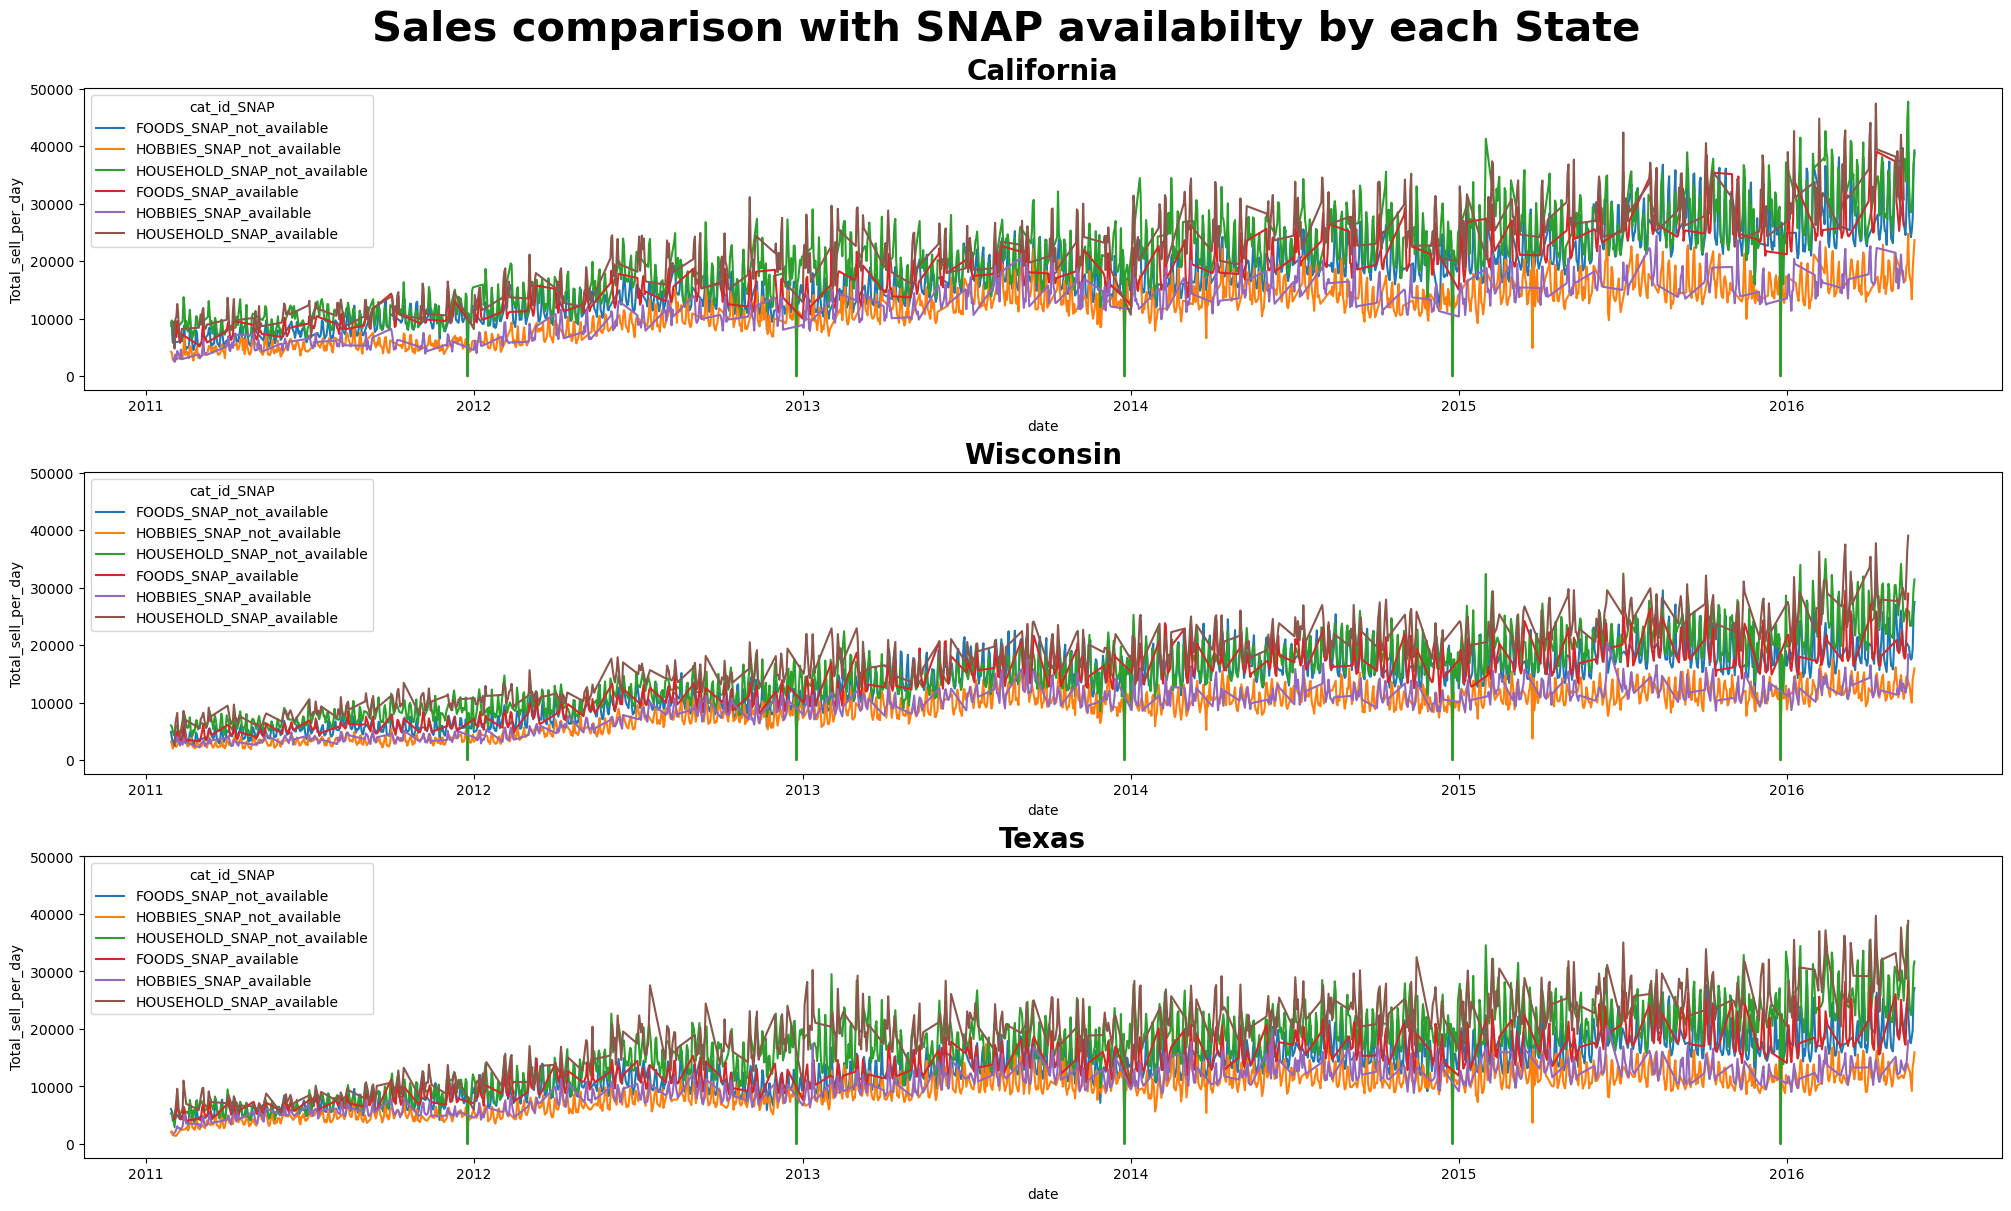

In [204]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales comparison with SNAP availabilty by each State', fontsize = 30, weight = 'bold')

snap_graph_CA = sns.lineplot(x = "date", y = "Total_sell_per_day", hue="cat_id_SNAP", data = data_merge_calender_date_cat_CA, 
             ax = ax[0]) 
snap_graph_CA.set_title('California', size = 20, weight = 'bold')

snap_graph_WI =sns.lineplot(x = "date", y = "Total_sell_per_day", hue="cat_id_SNAP",  data = data_merge_calender_date_cat_WI, 
             ax = ax[1]) 
snap_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')

snap_graph_TX =sns.lineplot(x = "date", y = "Total_sell_per_day", hue="cat_id_SNAP", data = data_merge_calender_date_cat_TX, 
             ax = ax[2]) 
snap_graph_TX.set_title('Texas', size = 20, weight = 'bold')

## Counting number of zeros in the code


In [209]:
data_merge_calender.head()

id       date  Daily_total_sales      item_id  \
0  FOODS_1_001_CA_1_evaluation 2011-01-29                0.0  FOODS_1_001   
1  FOODS_1_001_CA_2_evaluation 2011-01-29                0.0  FOODS_1_001   
2  FOODS_1_001_CA_3_evaluation 2011-01-29                0.0  FOODS_1_001   
3  FOODS_1_001_CA_4_evaluation 2011-01-29                0.0  FOODS_1_001   
4  FOODS_1_001_TX_1_evaluation 2011-01-29                0.0  FOODS_1_001   

   dept_id cat_id store_id state_id  d  wm_yr_wk  ... month  year    d  \
0  FOODS_1  FOODS     CA_1       CA  0     11101  ...     1  2011  d_1   
1  FOODS_1  FOODS     CA_2       CA  0     11101  ...     1  2011  d_1   
2  FOODS_1  FOODS     CA_3       CA  0     11101  ...     1  2011  d_1   
3  FOODS_1  FOODS     CA_4       CA  0     11101  ...     1  2011  d_1   
4  FOODS_1  FOODS     TX_1       TX  0     11101  ...     1  2011  d_1   

   event_name_1 event_type_1 event_name_2 event_type_2 snap_CA snap_TX  \
0      No_Event     No_Event     No_Event     No_Event       0       0   
1      No_Event     No_Event     No_Event     No_Event       0       0   
2      No_Event     No_Event     No_Event     No_Event       0       0   
3      No_Event     No_Event     No_Event     No_Event       0       0   
4      No_Event     No_Event     No_Event     No_Event       0       0   

   snap_WI  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 22 columns]

In [212]:
number_of_zero = data_merge_calender.loc[data_merge_calender['Daily_total_sales'] == 0].groupby('date')['Daily_total_sales'].count().to_frame('Number_Of_Zero').reset_index()

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


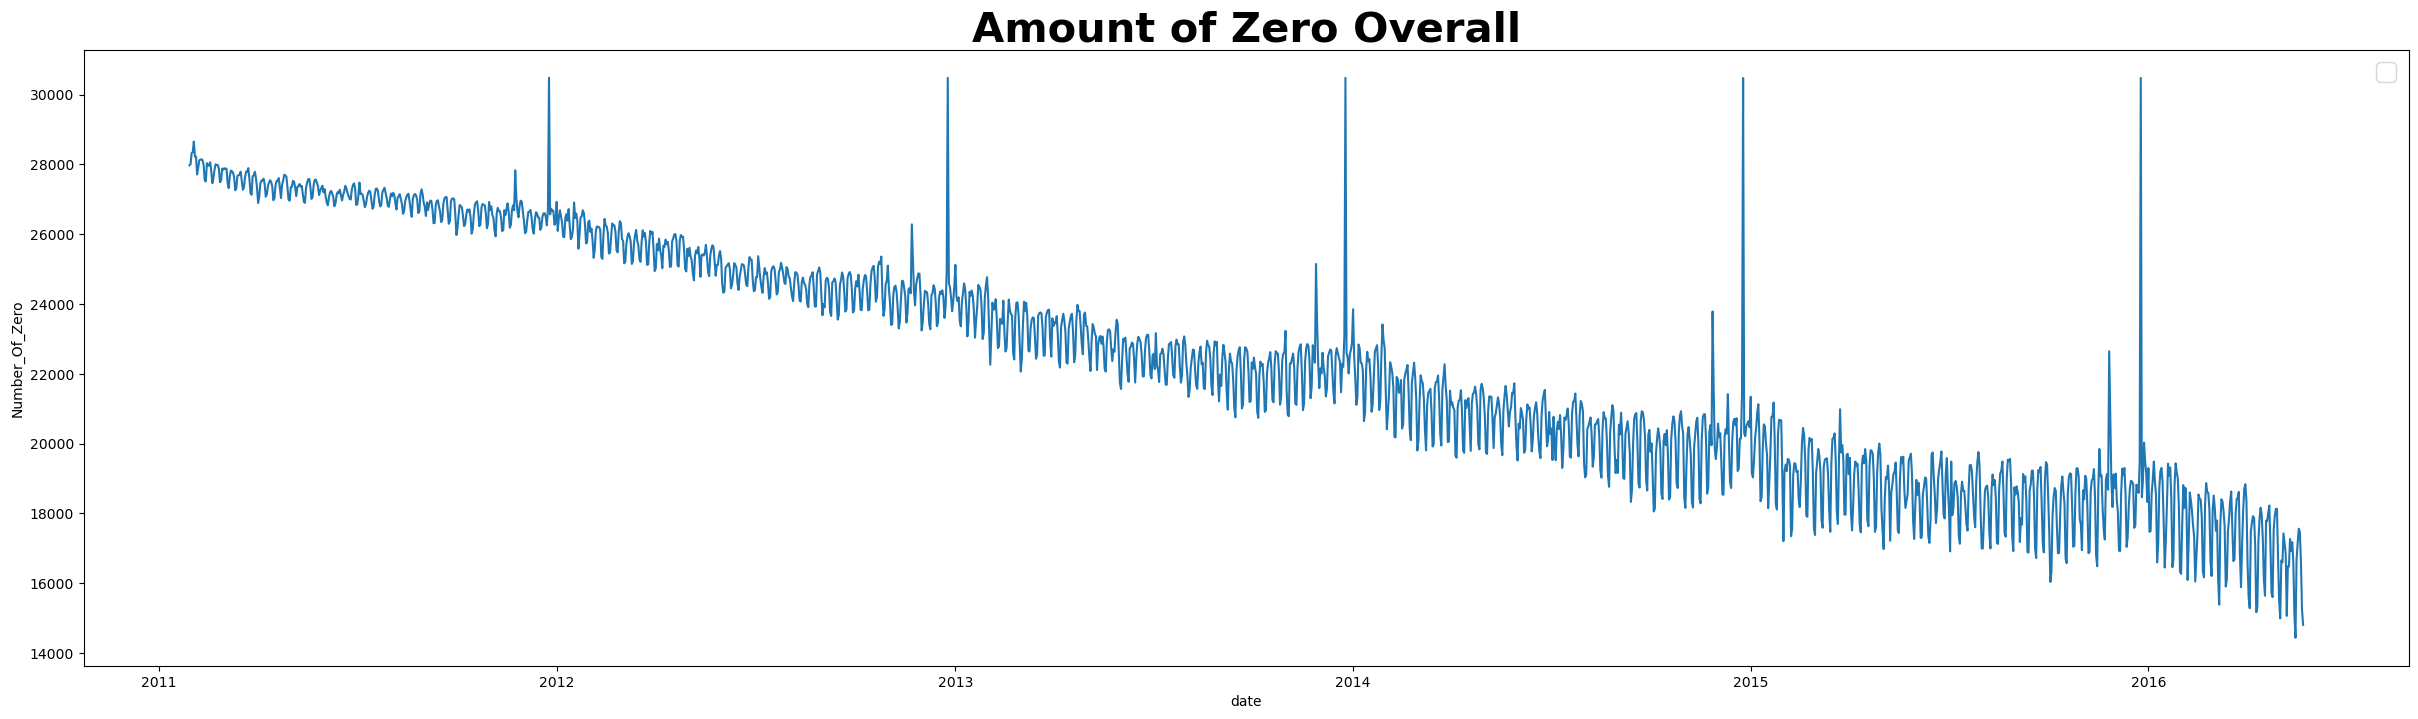

In [213]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Number_Of_Zero",
             data=number_of_zero)
plt.legend( prop ={'size':18})
plt.title("Amount of Zero Overall", fontsize = 30, weight = 'bold')
plt.show()

In [253]:
weekly_sell = data_merge_calender.groupby(['id','wm_yr_wk'])['Daily_total_sales'].sum().to_frame('Sum_sale_per_week').reset_index()

In [255]:
weekly_sell = weekly_sell.merge(df_calender.loc[df_calender['wday'] == 1][['date', 'wm_yr_wk']], on = 'wm_yr_wk')

In [258]:
number_of_zero_weekly = weekly_sell.loc[weekly_sell['Sum_sale_per_week'] == 0].groupby('date')['Sum_sale_per_week'].count().to_frame('Number_Of_Zero_Weekly').reset_index()

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


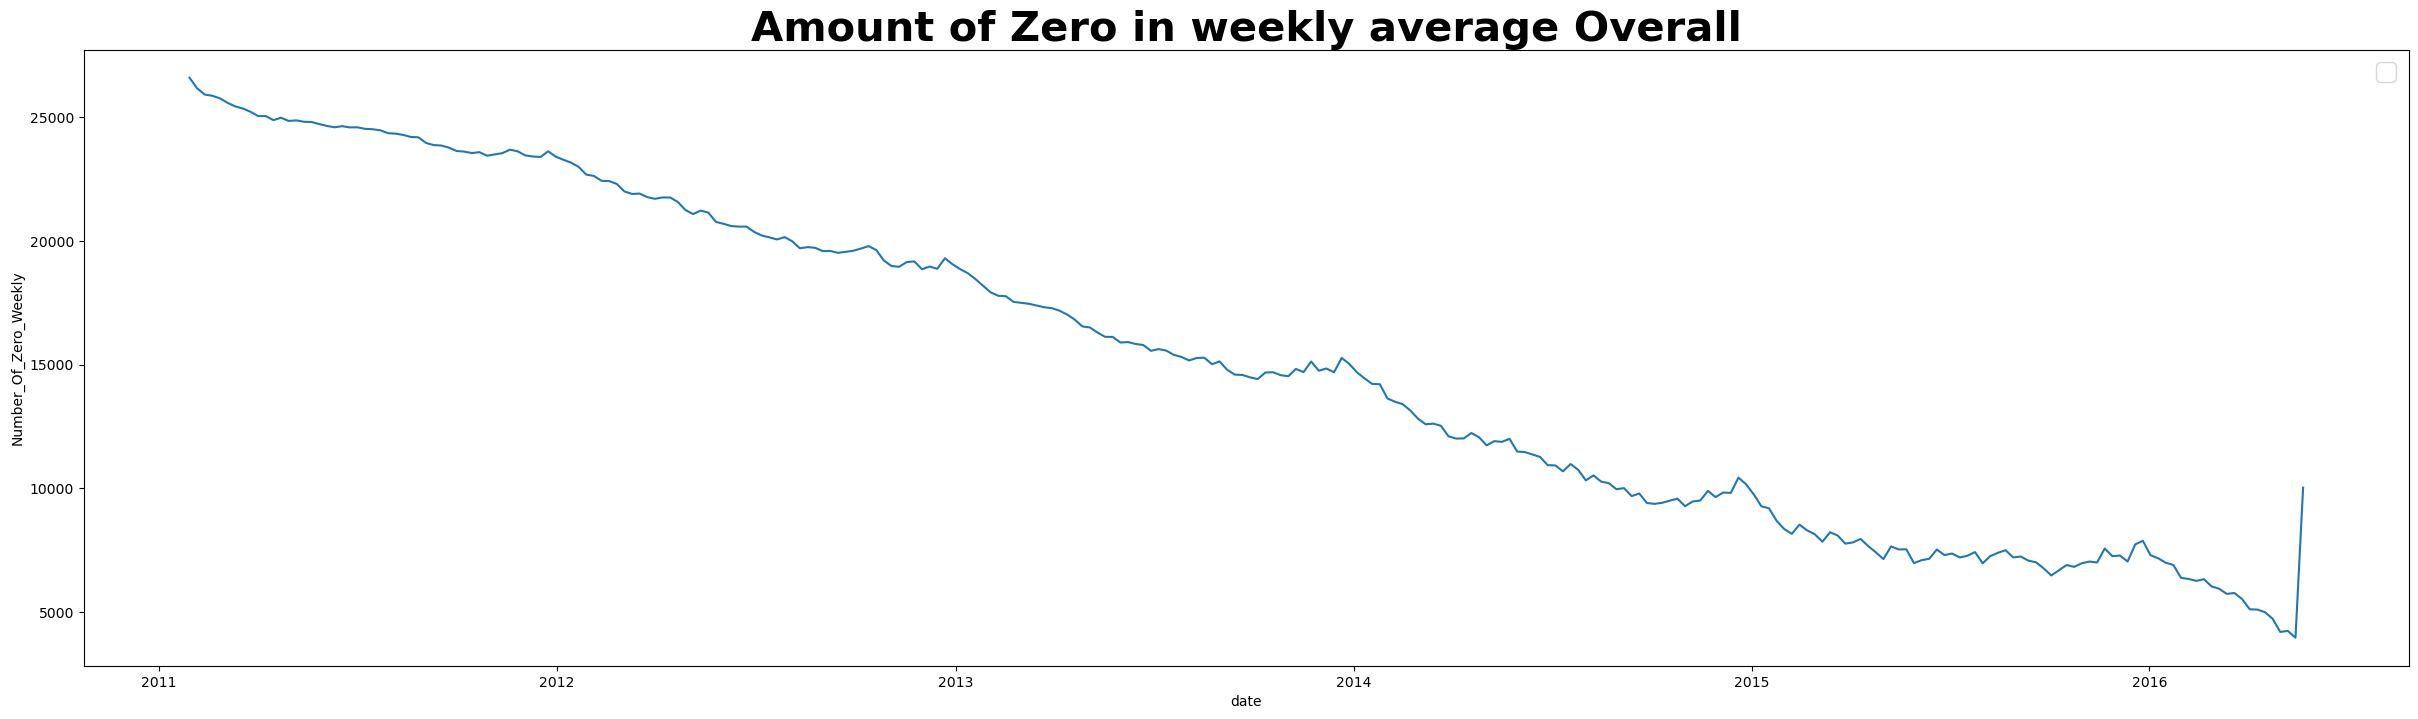

In [269]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Number_Of_Zero_Weekly",
             data=number_of_zero_weekly)
plt.legend( prop ={'size':18})
plt.title("Amount of Zero in weekly average Overall", fontsize = 30, weight = 'bold')
plt.show()

In [263]:
number_of_zero_weekly.tail()

date  Number_Of_Zero_Weekly
273 2016-04-23                   4734
274 2016-04-30                   4201
275 2016-05-07                   4241
276 2016-05-14                   3966
277 2016-05-21                  10029

In [271]:
monthly_sell = weekly_sell.merge(df_calender[['month', 'wm_yr_wk']], on = 'wm_yr_wk')


In [275]:
weekly_sell

id  wm_yr_wk  Sum_sale_per_week  \
0            FOODS_1_001_CA_1_evaluation     11101               0.00   
1            FOODS_1_001_CA_2_evaluation     11101               0.00   
2            FOODS_1_001_CA_3_evaluation     11101               0.00   
3            FOODS_1_001_CA_4_evaluation     11101               0.00   
4            FOODS_1_001_TX_1_evaluation     11101               0.00   
...                                  ...       ...                ...   
8476215  HOUSEHOLD_2_516_TX_2_evaluation     11617              11.88   
8476216  HOUSEHOLD_2_516_TX_3_evaluation     11617               5.94   
8476217  HOUSEHOLD_2_516_WI_1_evaluation     11617              11.88   
8476218  HOUSEHOLD_2_516_WI_2_evaluation     11617               5.94   
8476219  HOUSEHOLD_2_516_WI_3_evaluation     11617              35.64   

              date  
0       2011-01-29  
1       2011-01-29  
2       2011-01-29  
3       2011-01-29  
4       2011-01-29  
...            ...  
8476215 2016-05-21  
8476216 2016-05-21  
8476217 2016-05-21  
8476218 2016-05-21  
8476219 2016-05-21  

[8476220 rows x 4 columns]

In [ ]:
number_of_zero_monthly = monthly_sell.loc[monthly_sell['Sum_sale_per_month'] == 0].groupby('date')['Sum_sale_per_month'].count().to_frame('Number_Of_Zero_Monthly').reset_index()